In [1]:
path='D:/VScode/Last_deglaciation/data/LGMR_SIC_May2023.nc'

# read the nc file from the path
import xarray as xr
ds_seaice = xr.open_dataset(path)
ds_seaice

c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


<xarray.Dataset>
Dimensions:  (lat: 96, lon: 144, age: 120, dims: 5)
Coordinates:
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * age      (age) float32 100.0 300.0 500.0 ... 2.35e+04 2.37e+04 2.39e+04
  * dims     (dims) object 'mean              ' ... '97.5percentile    '
Data variables:
    sic      (dims, age, lat, lon) float32 ...

In [3]:
ds_seaice.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:  (lat: 96, lon: 144, age: 120, dims: 5)
Coordinates:
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * age      (age) float32 100.0 300.0 500.0 ... 2.35e+04 2.37e+04 2.39e+04
  * dims     (dims) object 'mean              ' ... '97.5percentile    '
Data variables:
    sic      (dims, age, lat, lon) float32 ...>

In [11]:
print(ds_seaice.coords['dims'].values)

['mean              ' 'median            ' 'standard_deviation'
 '2.5percentile     ' '97.5percentile    ']


In [16]:
print(ds_seaice.coords['age'].values)

[  100.   300.   500.   700.   900.  1100.  1300.  1500.  1700.  1900.
  2100.  2300.  2500.  2700.  2900.  3100.  3300.  3500.  3700.  3900.
  4100.  4300.  4500.  4700.  4900.  5100.  5300.  5500.  5700.  5900.
  6100.  6300.  6500.  6700.  6900.  7100.  7300.  7500.  7700.  7900.
  8100.  8300.  8500.  8700.  8900.  9100.  9300.  9500.  9700.  9900.
 10100. 10300. 10500. 10700. 10900. 11100. 11300. 11500. 11700. 11900.
 12100. 12300. 12500. 12700. 12900. 13100. 13300. 13500. 13700. 13900.
 14100. 14300. 14500. 14700. 14900. 15100. 15300. 15500. 15700. 15900.
 16100. 16300. 16500. 16700. 16900. 17100. 17300. 17500. 17700. 17900.
 18100. 18300. 18500. 18700. 18900. 19100. 19300. 19500. 19700. 19900.
 20100. 20300. 20500. 20700. 20900. 21100. 21300. 21500. 21700. 21900.
 22100. 22300. 22500. 22700. 22900. 23100. 23300. 23500. 23700. 23900.]


# Plot the data for a check

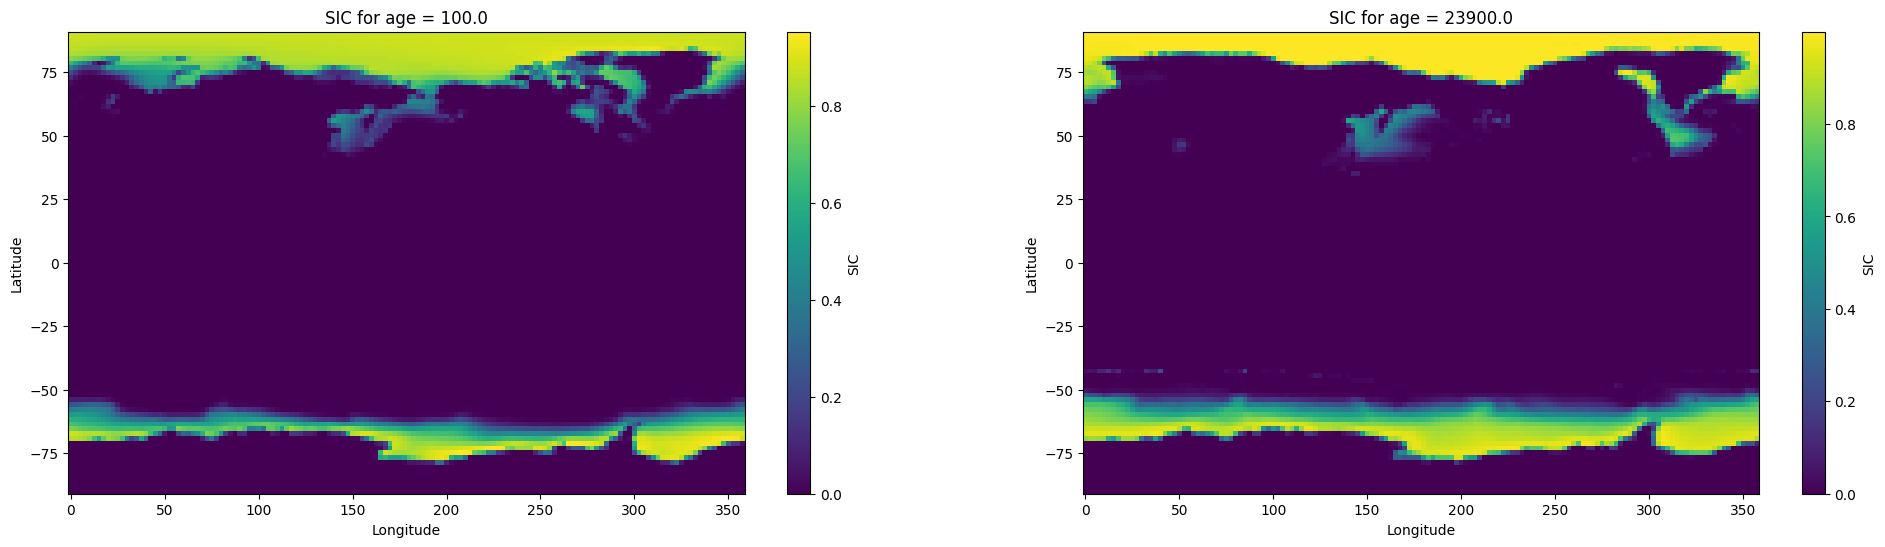

In [30]:
import matplotlib.pyplot as plt
import xarray as xr

# Create the heatmap plot
plt.figure(figsize=(24, 6))  # Increase figure size for two subplots

# First subplot for age=0
plt.subplot(1, 2, 1)

sic_data_0 = ds_seaice['sic'].isel(dims=0, age=0)
plt.pcolormesh(ds_seaice['lon'], ds_seaice['lat'], sic_data_0, shading='auto')
plt.colorbar(label='SIC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'SIC for age = {ds_seaice.age.values[0]}')

# Second subplot for age=119
plt.subplot(1, 2, 2)
sic_data_119 = ds_seaice['sic'].isel(dims=0, age=119)
plt.pcolormesh(ds_seaice['lon'], ds_seaice['lat'], sic_data_119, shading='auto')
plt.colorbar(label='SIC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'SIC for age = {ds_seaice.age.values[119]}')

# Show the plot
plt.show()


# Doing GMM and get the class boundaries

In [2]:
import xarray as xr

data_dir = 'D:/VScode/Last_deglaciation/data'
ds_sat_EOFs = xr.open_dataset(data_dir + '/ds_sat_EOFs.nc')

import numpy as np

EOF1 = ds_sat_EOFs['EOF1'].values
EOF2 = ds_sat_EOFs['EOF2'].values

# Get dimensions
n_lat = len(ds_sat_EOFs['lat'])
n_lon = len(ds_sat_EOFs['lon'])

# Reshape each EOF to (len(lat)*len(lon), 1)
EOF1_reshaped = np.reshape(EOF1, (n_lat * n_lon, 1))
EOF2_reshaped = np.reshape(EOF2, (n_lat * n_lon, 1))

# Concatenate the reshaped EOF1 and EOF2 arrays along axis 1
EOF_concatenated = np.concatenate((EOF1_reshaped, EOF2_reshaped), axis=1)


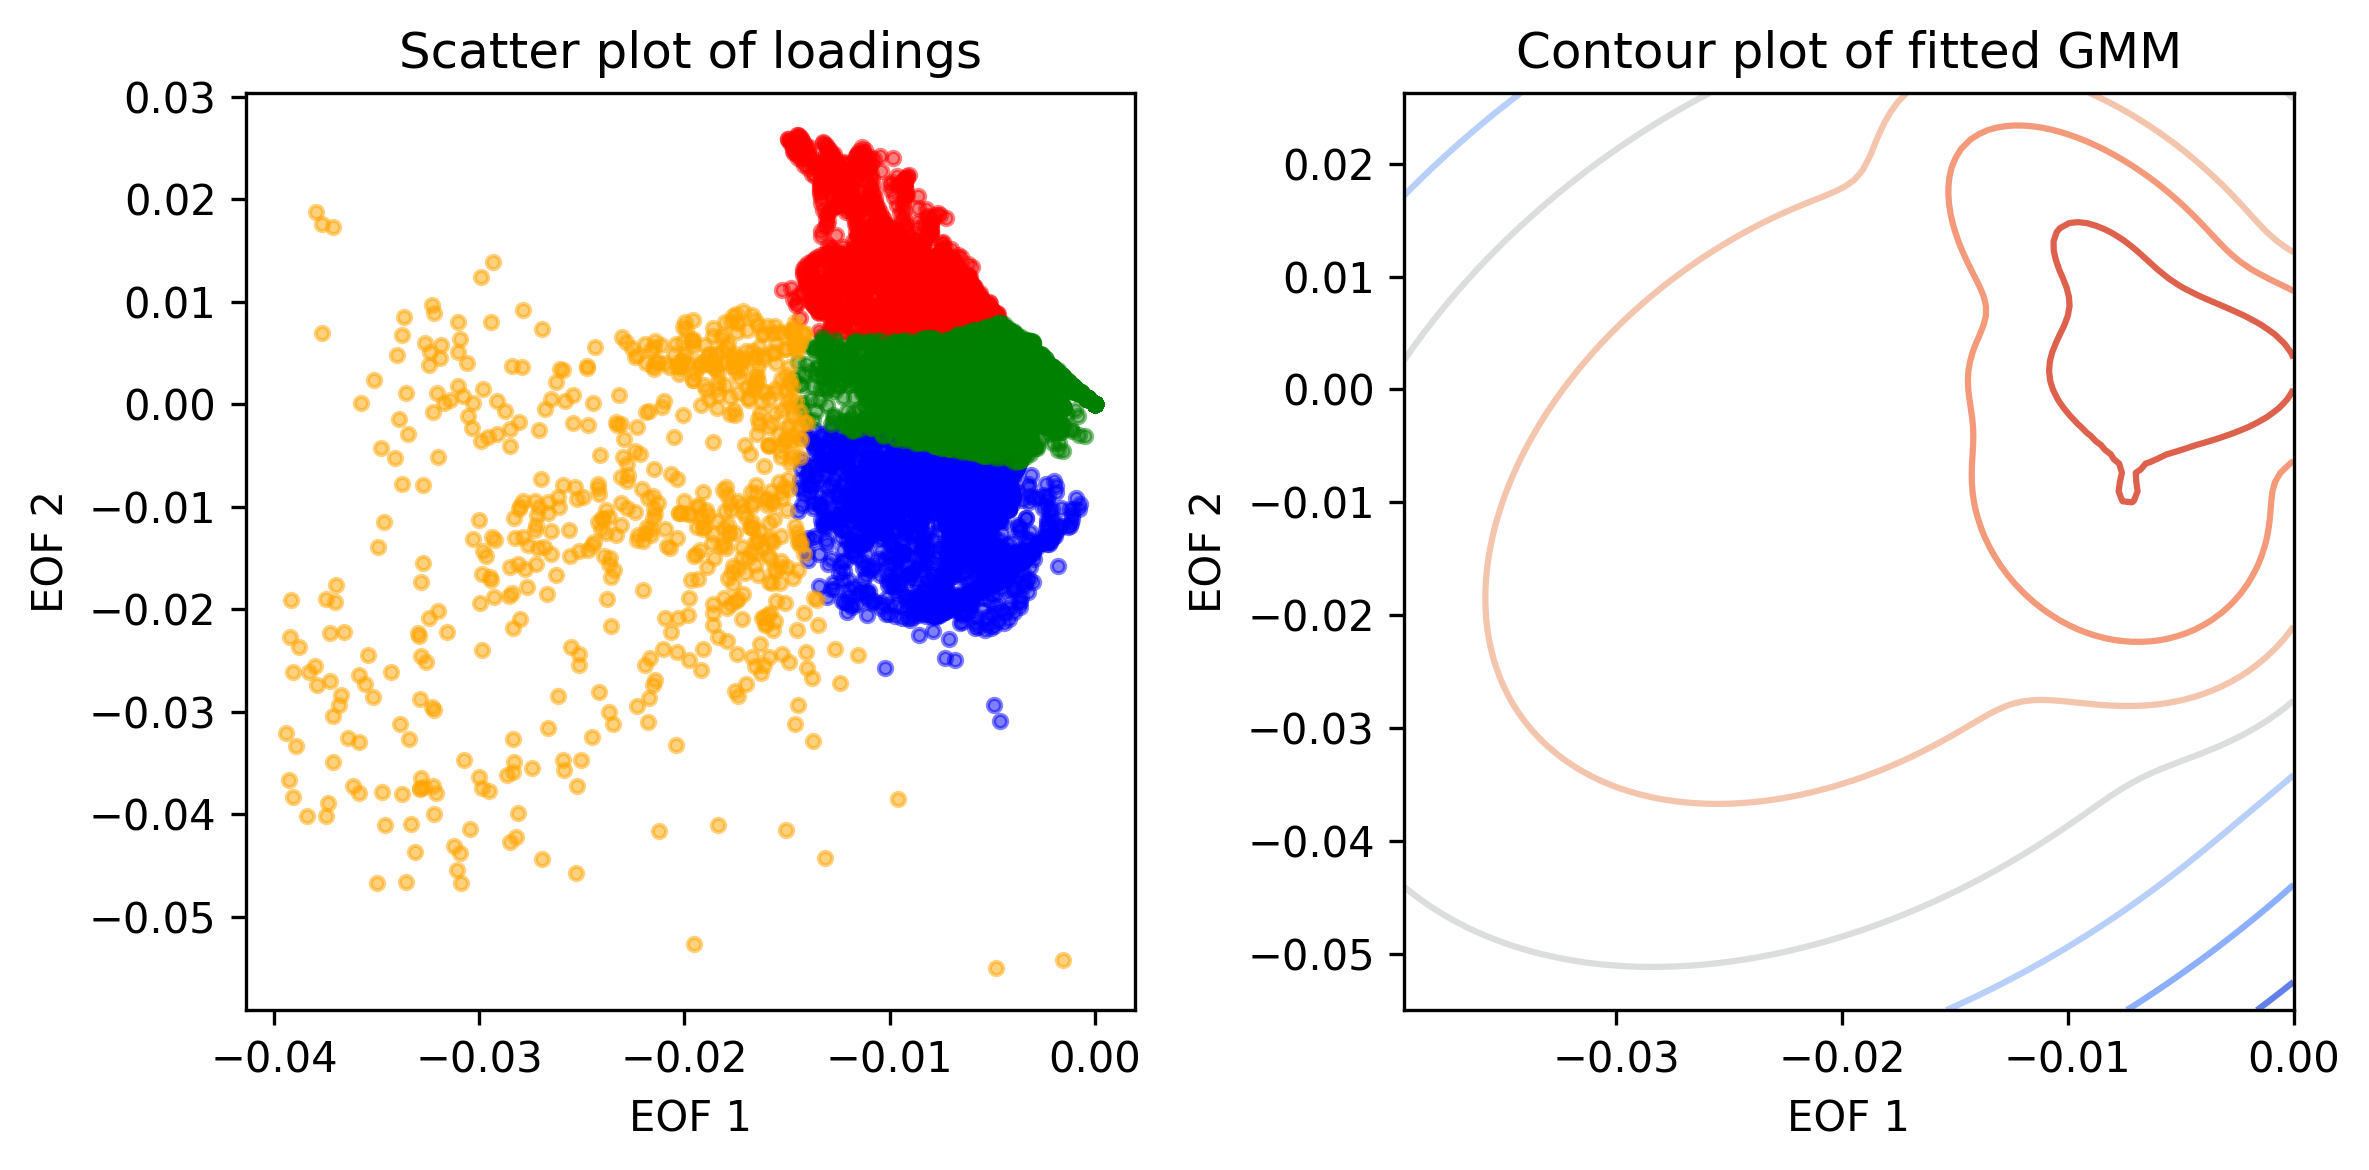

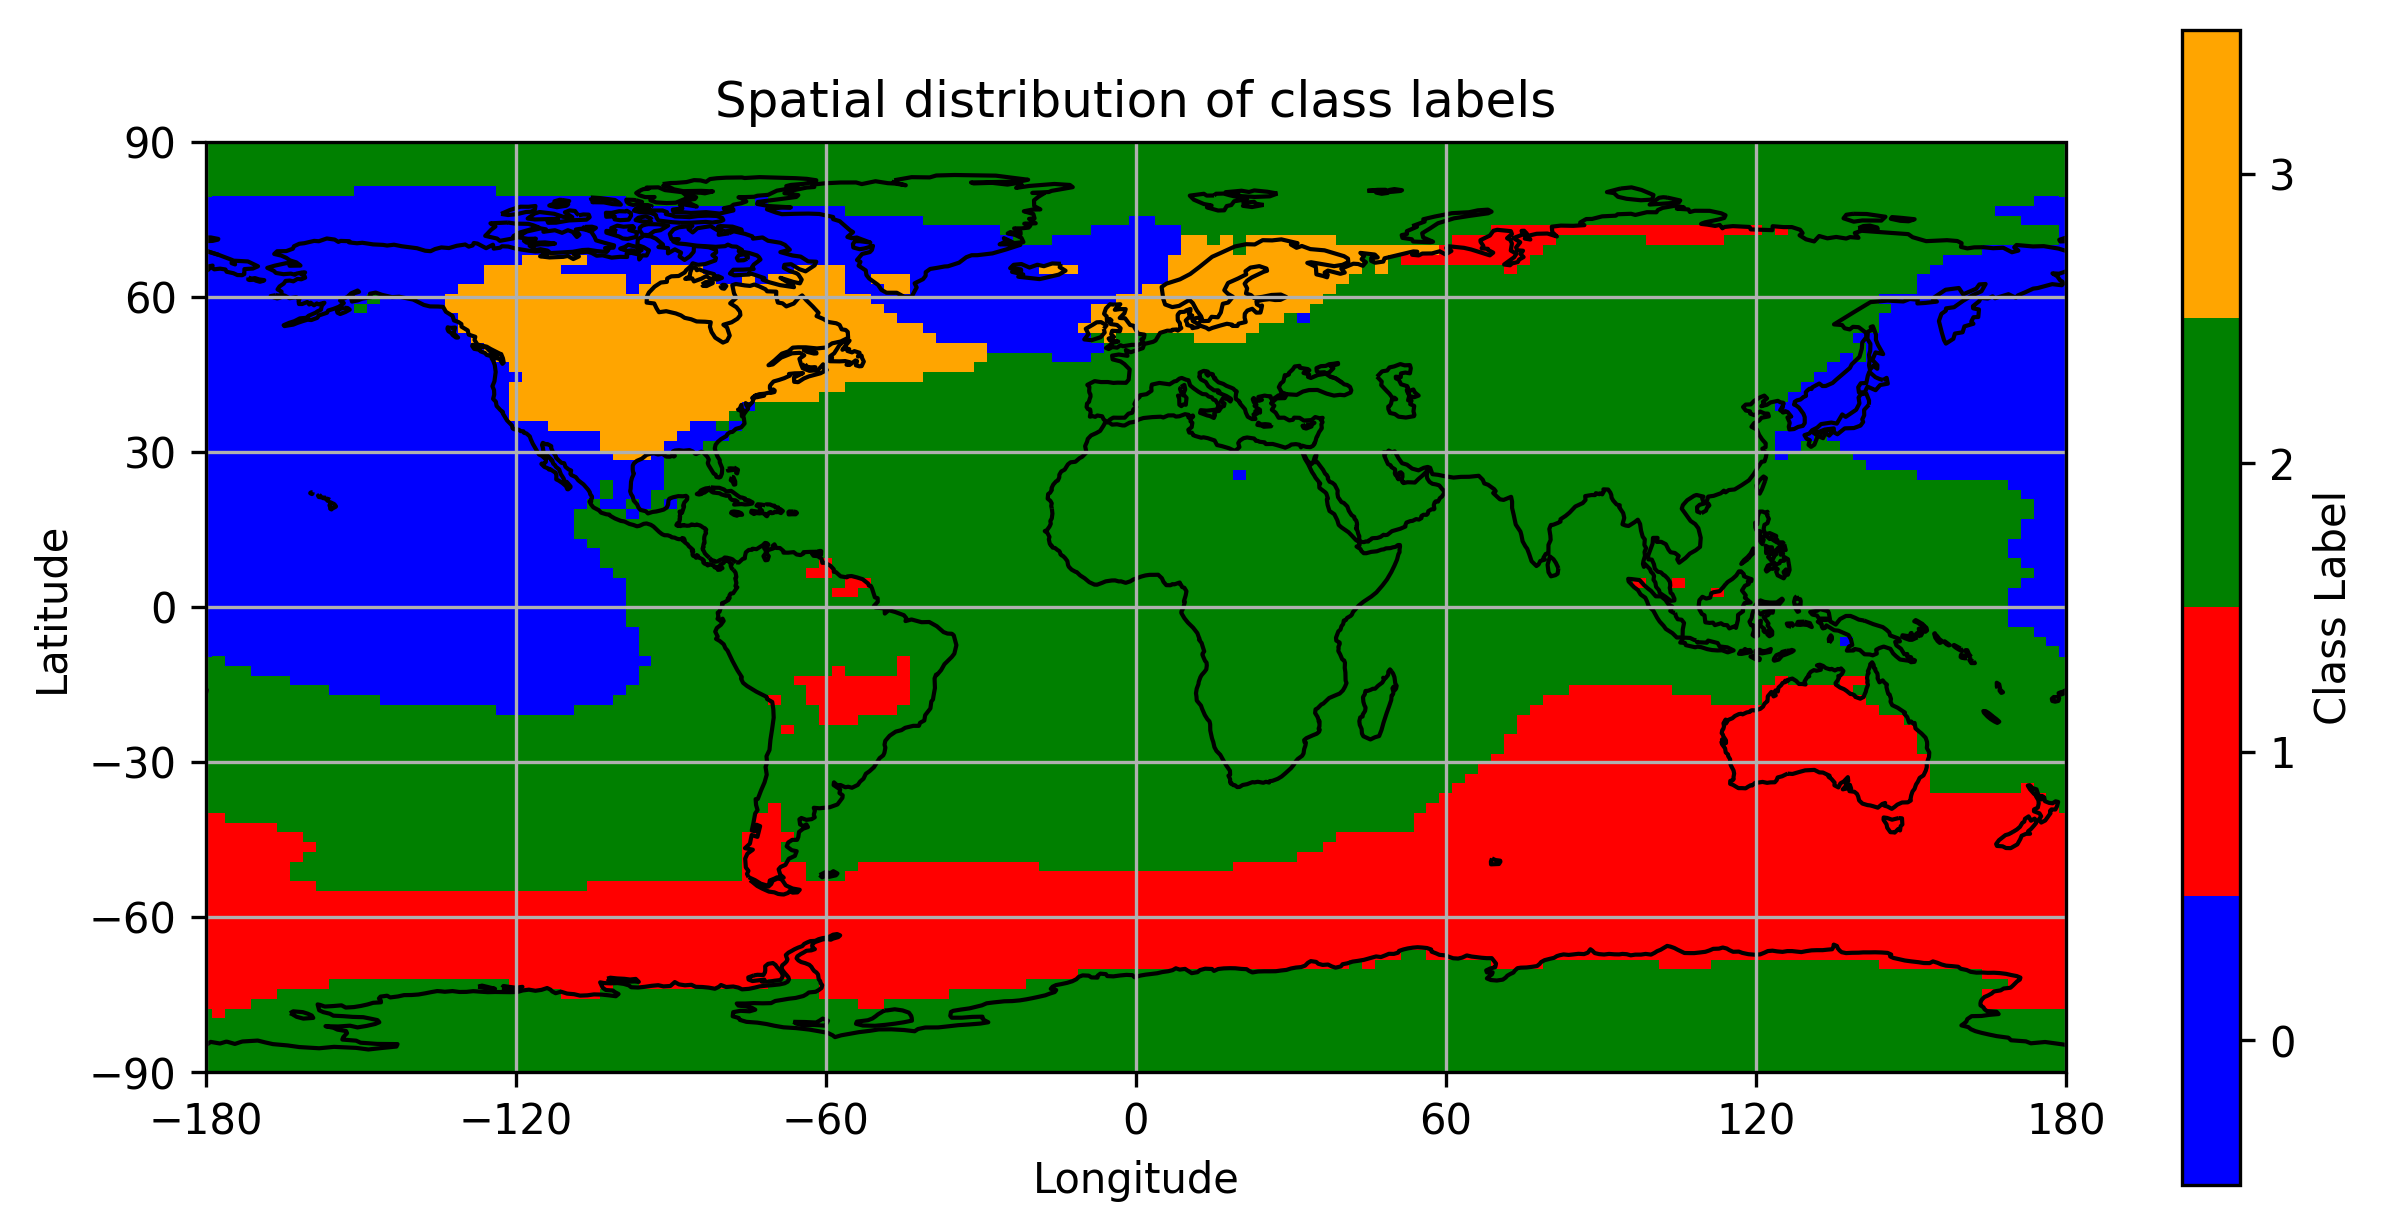

In [3]:
from toolbox import GMM_functions as gf
ds_EOFs_GMM=gf.GMM4EOFS(EOF_concatenated, ds_sat_EOFs,n_components=4)
gf.plot_labels(ds_EOFs_GMM)

# Get the lat-lon pairs of the Southern Ocean class

In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

def plot_labels_and_latlon_pairs(ds, lat_lon_pairs,class_value):
    sat_label = ds['class_label']

    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(projection=ccrs.PlateCarree()),dpi=300)

    ax.add_feature(cfeature.COASTLINE)
    ax.gridlines()

    cmap = mcolors.ListedColormap(colors[0:len(np.unique(sat_label))])

    im = ax.pcolormesh(ds.lon, ds.lat, sat_label, transform=ccrs.PlateCarree(), cmap=cmap, shading='auto')

    ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
    
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Spatial distribution of class labels')

    bounds = np.arange(len(np.unique(sat_label))+1) -0.5
    ticks = np.arange(len(np.unique(sat_label)))
    cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.05, boundaries=bounds, ticks=ticks)
    cbar.ax.set_yticklabels(np.unique(sat_label))
    cbar.ax.set_ylabel('Class Label')

    # Scatter plot for lat-lon pairs 
    lats, lons = zip(*lat_lon_pairs)
    ax.scatter(lons, lats, color='white',s=20, transform=ccrs.PlateCarree(), label=f'class_label={class_value}')
    
    plt.legend(loc='upper right')

    plt.show()


def get_latlon_of_class(ds, class_value=3, show_figure=False):
    # Find where class_label equals the specified class_value
    condition = ds['class_label'] == class_value
    
    # Get the indices where the condition holds true
    indices = np.argwhere(condition.values)
    
    # Fetch lat and lon values using the indices
    lat_values = ds['lat'].values[indices[:, 0]]
    lon_values = ds['lon'].values[indices[:, 1]]
    
    # Combine lat and lon into pairs
    lat_lon_pairs = list(zip(lat_values, lon_values))
    
    if show_figure:
        plot_labels_and_latlon_pairs(ds, lat_lon_pairs,class_value)
        
    return lat_lon_pairs

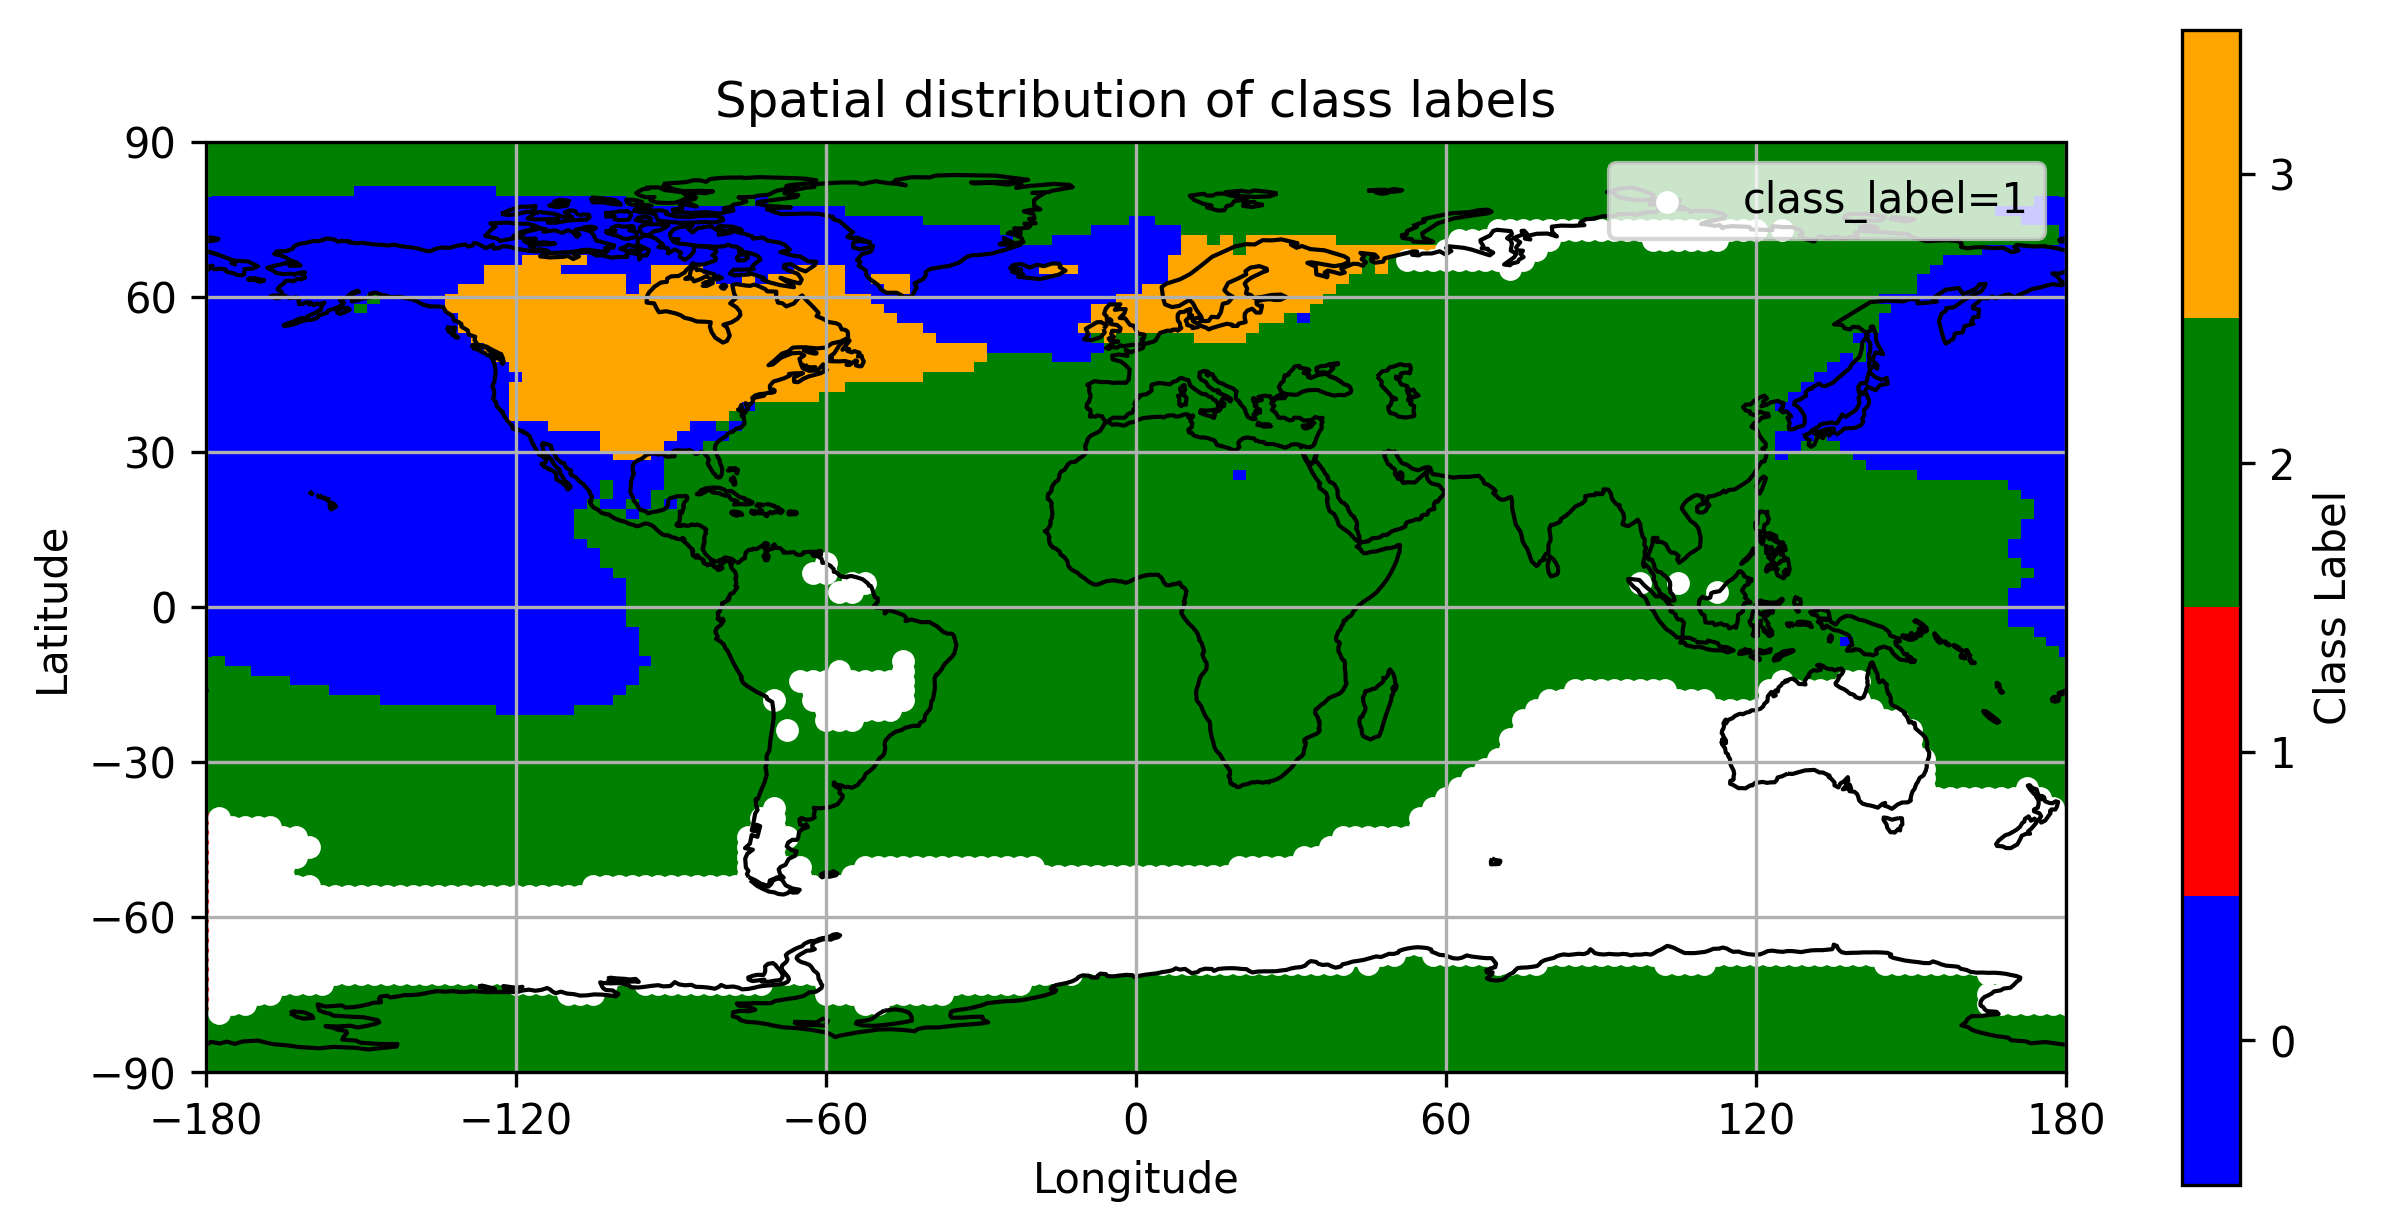

In [5]:
lat_lon_pairs = get_latlon_of_class(ds_EOFs_GMM, class_value=1, show_figure=True)

In [6]:
len(lat_lon_pairs)

2451

In [ ]:
# save the lat_lon_pairs
path='D:/VScode/Last_deglaciation/data/'
np.save(path+'lat_lon_pairs.npy',lat_lon_pairs)

# Extract the sea ice data for lat-lon pairs of the Southern Ocean class

In [74]:
import numpy as np
import xarray as xr

def extract_sic_data(ds_seaice, lat_lon_pairs):
    # Initialize a list to store the sic data
    sic_data_list = []
    
    # Loop through each lat-lon pair to extract the sic data
    for lat, lon in lat_lon_pairs:
        # Find the integer index corresponding to the lat and lon values
        lat_idx = np.argmin(np.abs(ds_seaice['lat'].values - lat))
        lon_idx = np.argmin(np.abs(ds_seaice['lon'].values - lon))
        
        # Extract sic data for dims=0 and age[:] for the current lat-lon pair
        # using integer-based indexing
        sic_data = ds_seaice['sic'].isel(dims=1,lat=lat_idx, lon=lon_idx).values
        
        # Append this data to our list
        sic_data_list.append(sic_data)
        
    # Convert list to a NumPy array for convenience
    sic_data_array = np.array(sic_data_list)
    
    return sic_data_array


In [75]:
sic_data_array = extract_sic_data(ds_seaice, lat_lon_pairs)
sic_data_array.shape

c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



(2442, 120)

# Calculate the weighted mean sea ice concentration (SIC) curve of the Southern Ocean Class

In [76]:
weight4class=[]
for lat, lon in lat_lon_pairs:
   
    lat_idx = np.argmin(np.abs(ds_sat_EOFs['lat'].values - lat))
    weight= ds_sat_EOFs['weight'].isel(lat=lat_idx).values
    weight4class.append(weight)

for i in range(0, len(weight4class)):
    # check whether sic_data_array[i,:] are all zero
    # to handle whit the situation that data points in the Southern Ocean class contain areas on land
    if np.all(sic_data_array[i,:]==0):
        continue
    else:
        weighted_timeseries=weight4class[i]*sic_data_array[i,:]
        # store the weighted timeseries in a new array
        if i==0:
            sic_weighted=weighted_timeseries
        else:
            sic_weighted=np.vstack((sic_weighted, weighted_timeseries))

# sum the sic_weighted for each class
sic_weighted_sum=np.sum(sic_weighted, axis=0)
class_weighted_mean=sic_weighted_sum/np.sum(weight4class, axis=0)
class_weighted_mean.shape

(120,)

Text(0, 0.5, 'SIC')

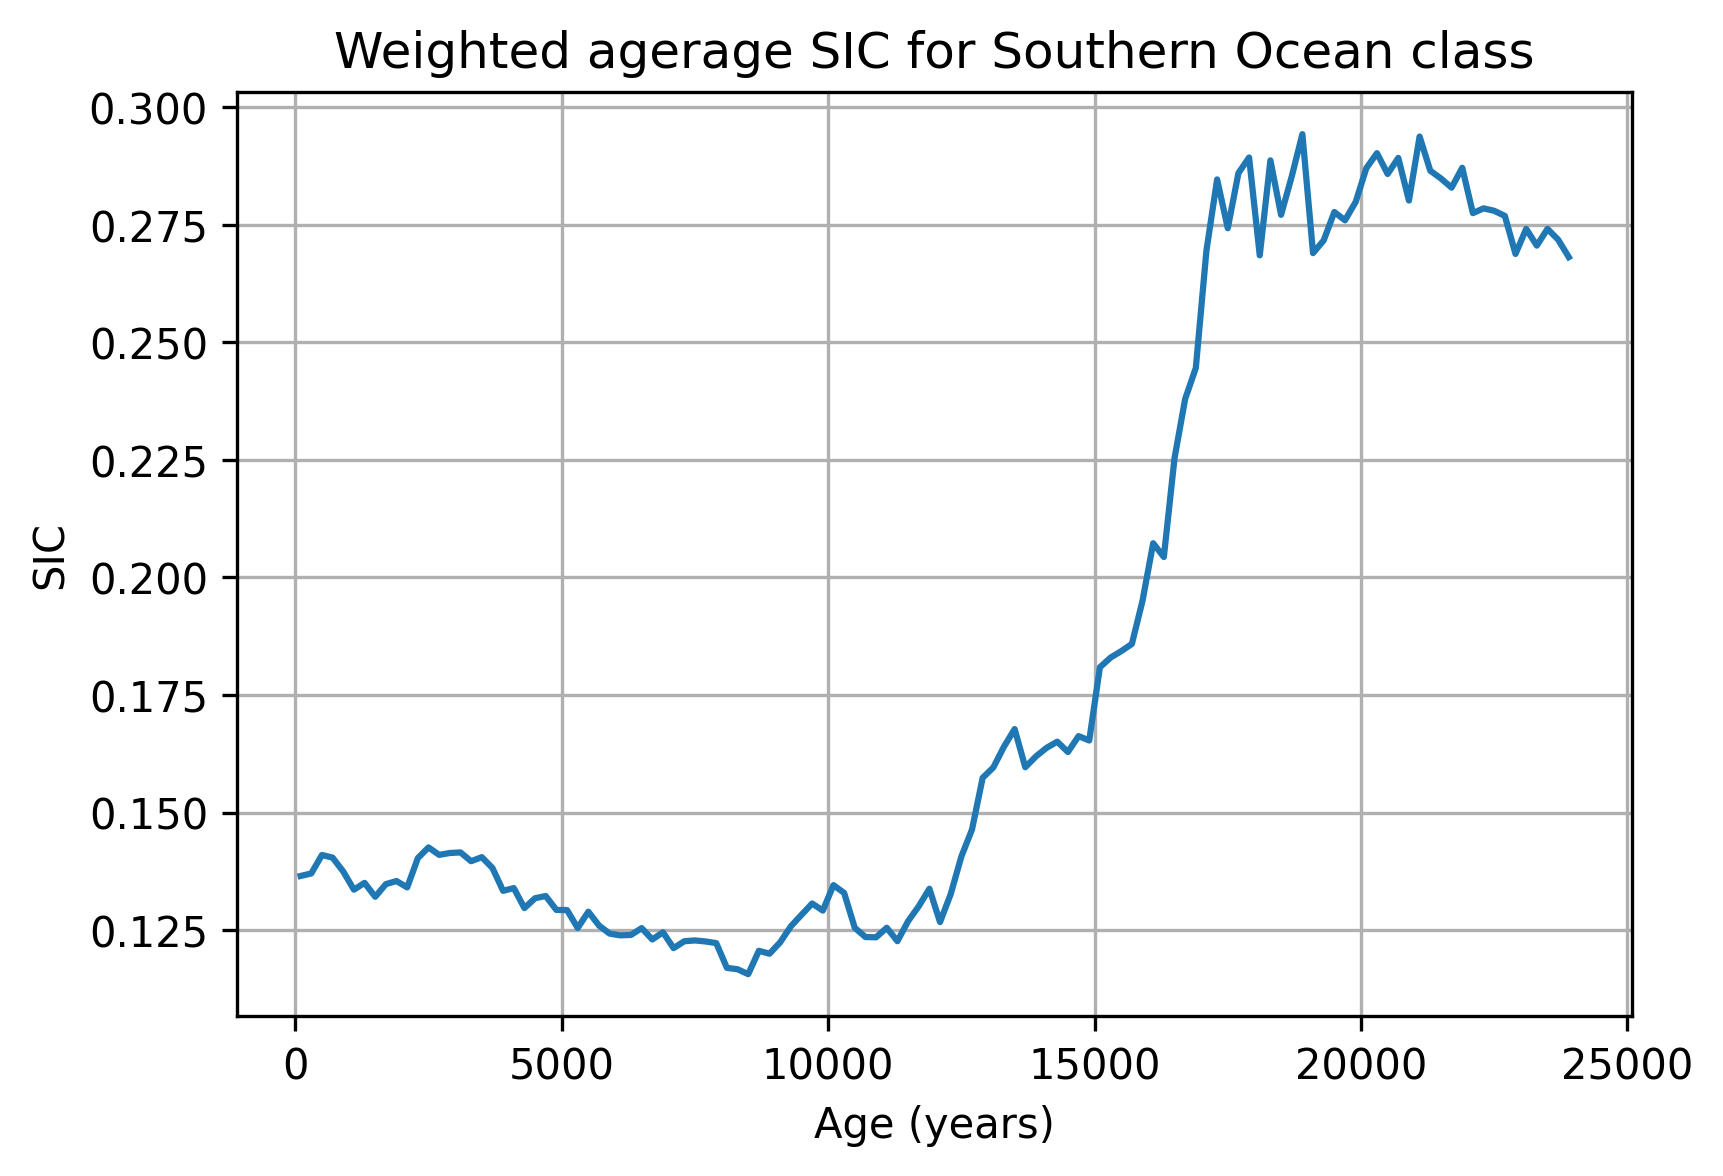

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4),dpi=300)
plt.plot(ds_seaice['age'], class_weighted_mean)
# add grid lines

plt.grid()
# add title and axis labels
plt.title('Weighted agerage SIC for Southern Ocean class')
plt.xlabel('Age (years)')
plt.ylabel('SIC')

# Randomly sample 64 SIC timeseries from the Southern Ocean for a check

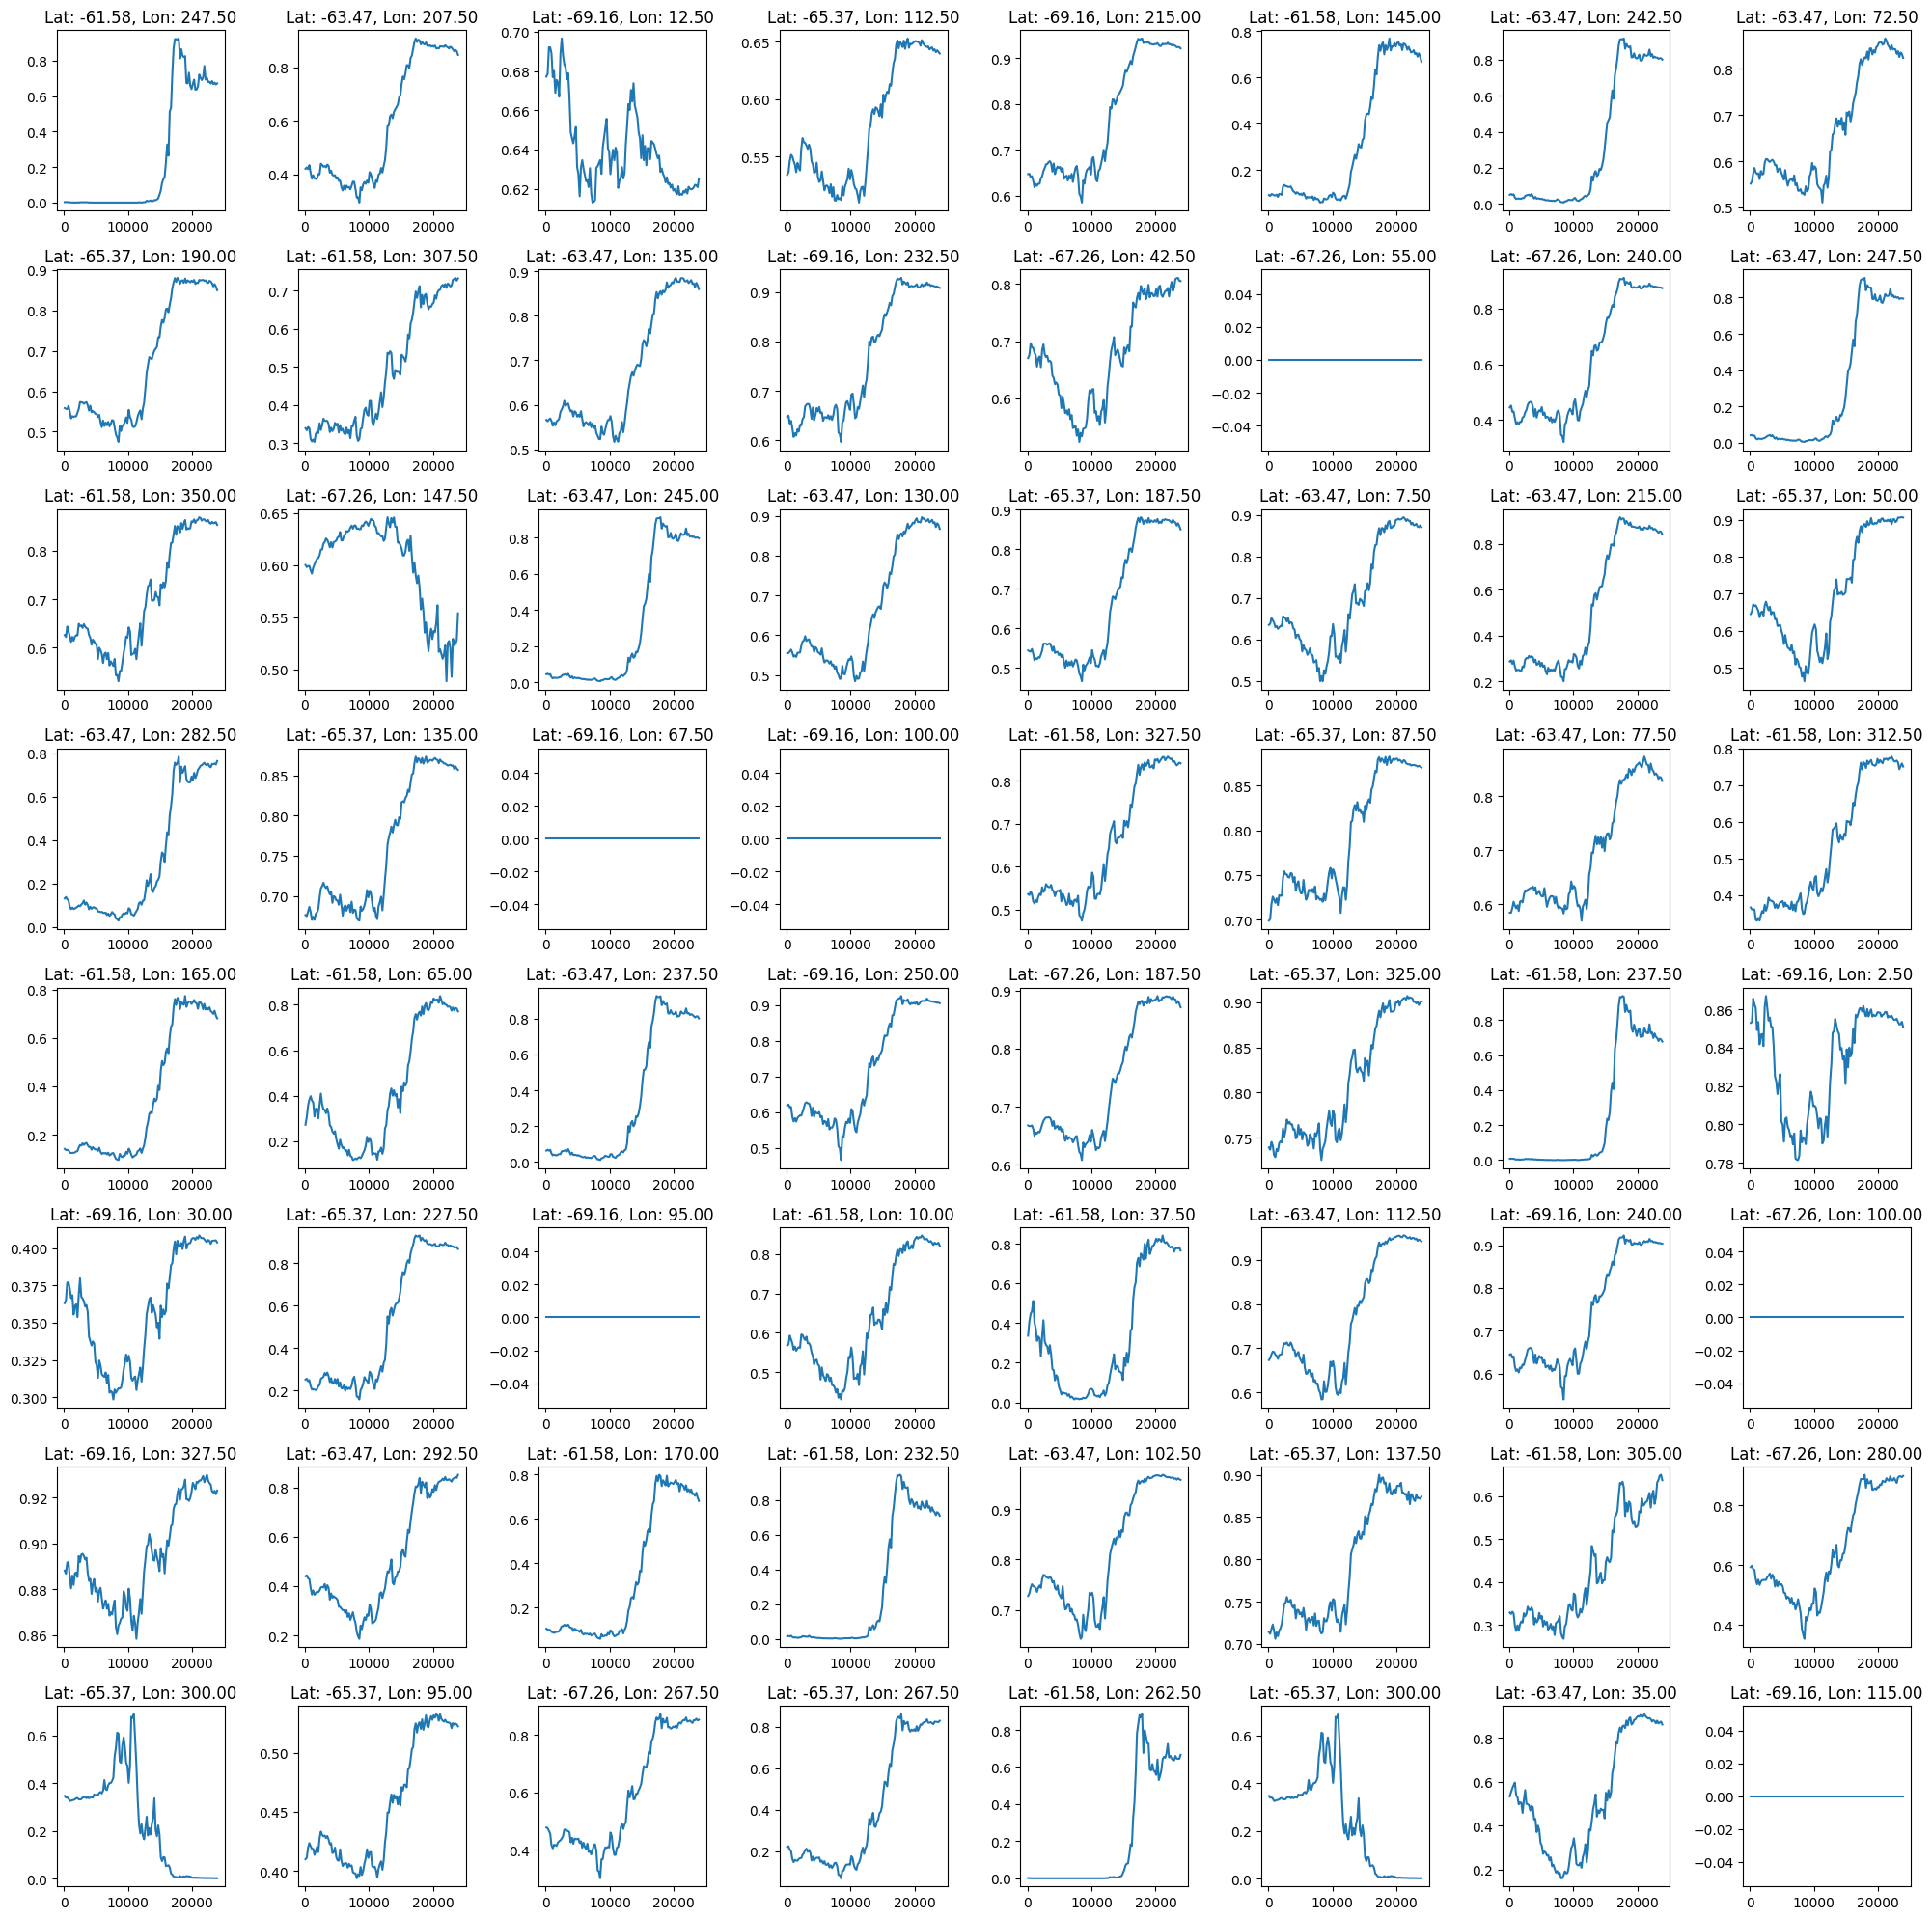

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

# Get the number of latitude and longitude points
# and filter latitudes that are less than -60
lat_values = ds_seaice['lat'].values
# get the data fro latitudes less than -60 and larger than -70
filtered_lat_indices = np.argwhere((lat_values < -60) & (lat_values > -70)).flatten()

n_filtered_lat = len(filtered_lat_indices)
n_lon = ds_seaice['lon'].size

# Generate random indices for lat and lon
random_lat_indices = np.random.choice(filtered_lat_indices, size=64)
random_lon_indices = np.random.randint(0, n_lon, size=64)

# Create an 8x8 grid of subplots
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(20, 20))

for i, ax in enumerate(axes.flatten()):
    # Get random lat and lon index
    lat_idx = random_lat_indices[i]
    lon_idx = random_lon_indices[i]
    
    # Get the actual lat and lon values
    lat_value = ds_seaice['lat'].isel(lat=lat_idx).values
    lon_value = ds_seaice['lon'].isel(lon=lon_idx).values
    
    # Extract the time series data for this lat, lon, and dim=1
    time_series_data = ds_seaice['sic'].isel(lat=lat_idx, lon=lon_idx, dims=1)
    
    # Plot the time series
    ax.plot(time_series_data['age'], time_series_data)
    
    # Add title to indicate lat and lon
    ax.set_title(f"Lat: {lat_value:.2f}, Lon: {lon_value:.2f}")

plt.tight_layout()
plt.show()


# Find the age where SIC reaches maximum, and use it as the time of sea ice retreat

c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



(96, 144)


c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



(96, 144)


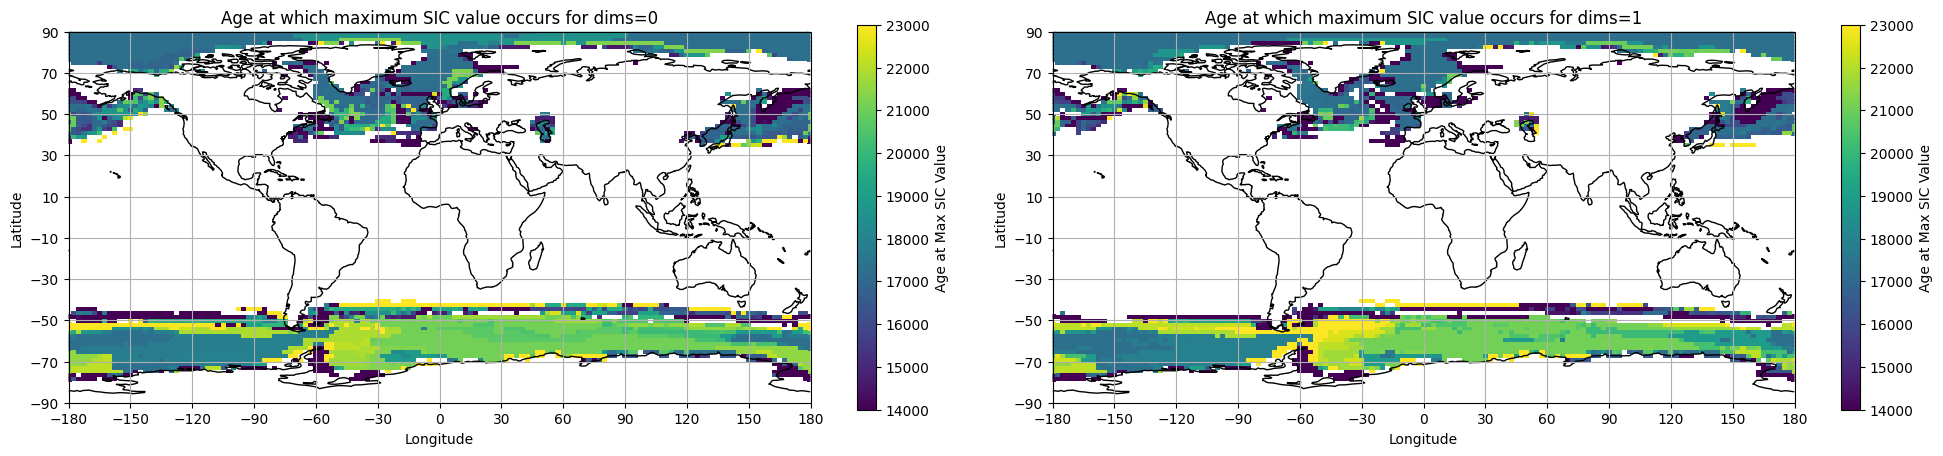

In [54]:
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Loop over both dimensions (0 and 1)
for i, dim in enumerate([0, 1]):
    ax = axes[i]
    # Add coastline to each subplot
    ax.add_feature(cfeature.COASTLINE)

    # Find the age where the maximum sic value occurs along the 'age' dimension for the current dim
    age_max_idx = ds_seaice['sic'].isel(dims=dim).idxmax(dim='age')
    transitions=age_max_idx.values
    # set transitions==10 to nan
    transitions[transitions<10000]=np.nan

    print(age_max_idx.values.shape)

    # Using pcolormesh for the heatmap
    c = ax.pcolormesh(ds_seaice['lon'], ds_seaice['lat'], transitions, shading='auto',vmin=14000, vmax=23000)

    # Adding colorbar and labels
    plt.colorbar(c, ax=ax, shrink=0.5, label='Age at Max SIC Value')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Age at which maximum SIC value occurs for dims={dim}')
    
    # Add lat-lon grid with 10-degree steps
    ax.set_xticks(np.arange(-180, 181, 30), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-90, 91, 20), crs=ccrs.PlateCarree())
    ax.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


# Sample the time series at a given location to check the shape of the curve

In [21]:

lat = -51
lon =330
plot_time_series_for_point(ds_seaice, lat, lon)

c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [18]:
import numpy as np
import xarray as xr
import plotly.graph_objects as go

def plot_time_series_for_point(ds_seaice, lat, lon, dim=1):
    # Find the closest lat and lon indices
    lat_idx = np.argmin(np.abs(ds_seaice['lat'].values - lat))
    lon_idx = np.argmin(np.abs(ds_seaice['lon'].values - lon))
    
    # Extract the time series data for the closest point
    time_series_data = ds_seaice['sic'].isel(dims=dim, lat=lat_idx, lon=lon_idx).values
    age_values = ds_seaice['age'].values
    
    # Create the plot using Plotly
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(x=age_values, y=time_series_data, mode='lines'))
    lat_text=ds_seaice['lat'][lat_idx].values
    lon_text=ds_seaice['lon'][lon_idx].values
    
    fig.update_layout(
        title=f'Time Series at Closest Point to Lat: {lat_text}, Lon: {lon_text} for dims={dim}',
        xaxis_title="Age",
        yaxis_title="SIC Value",
        width=800,  
        height=500   
    )
    
    fig.show()

# Plot all time series for a given region

c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



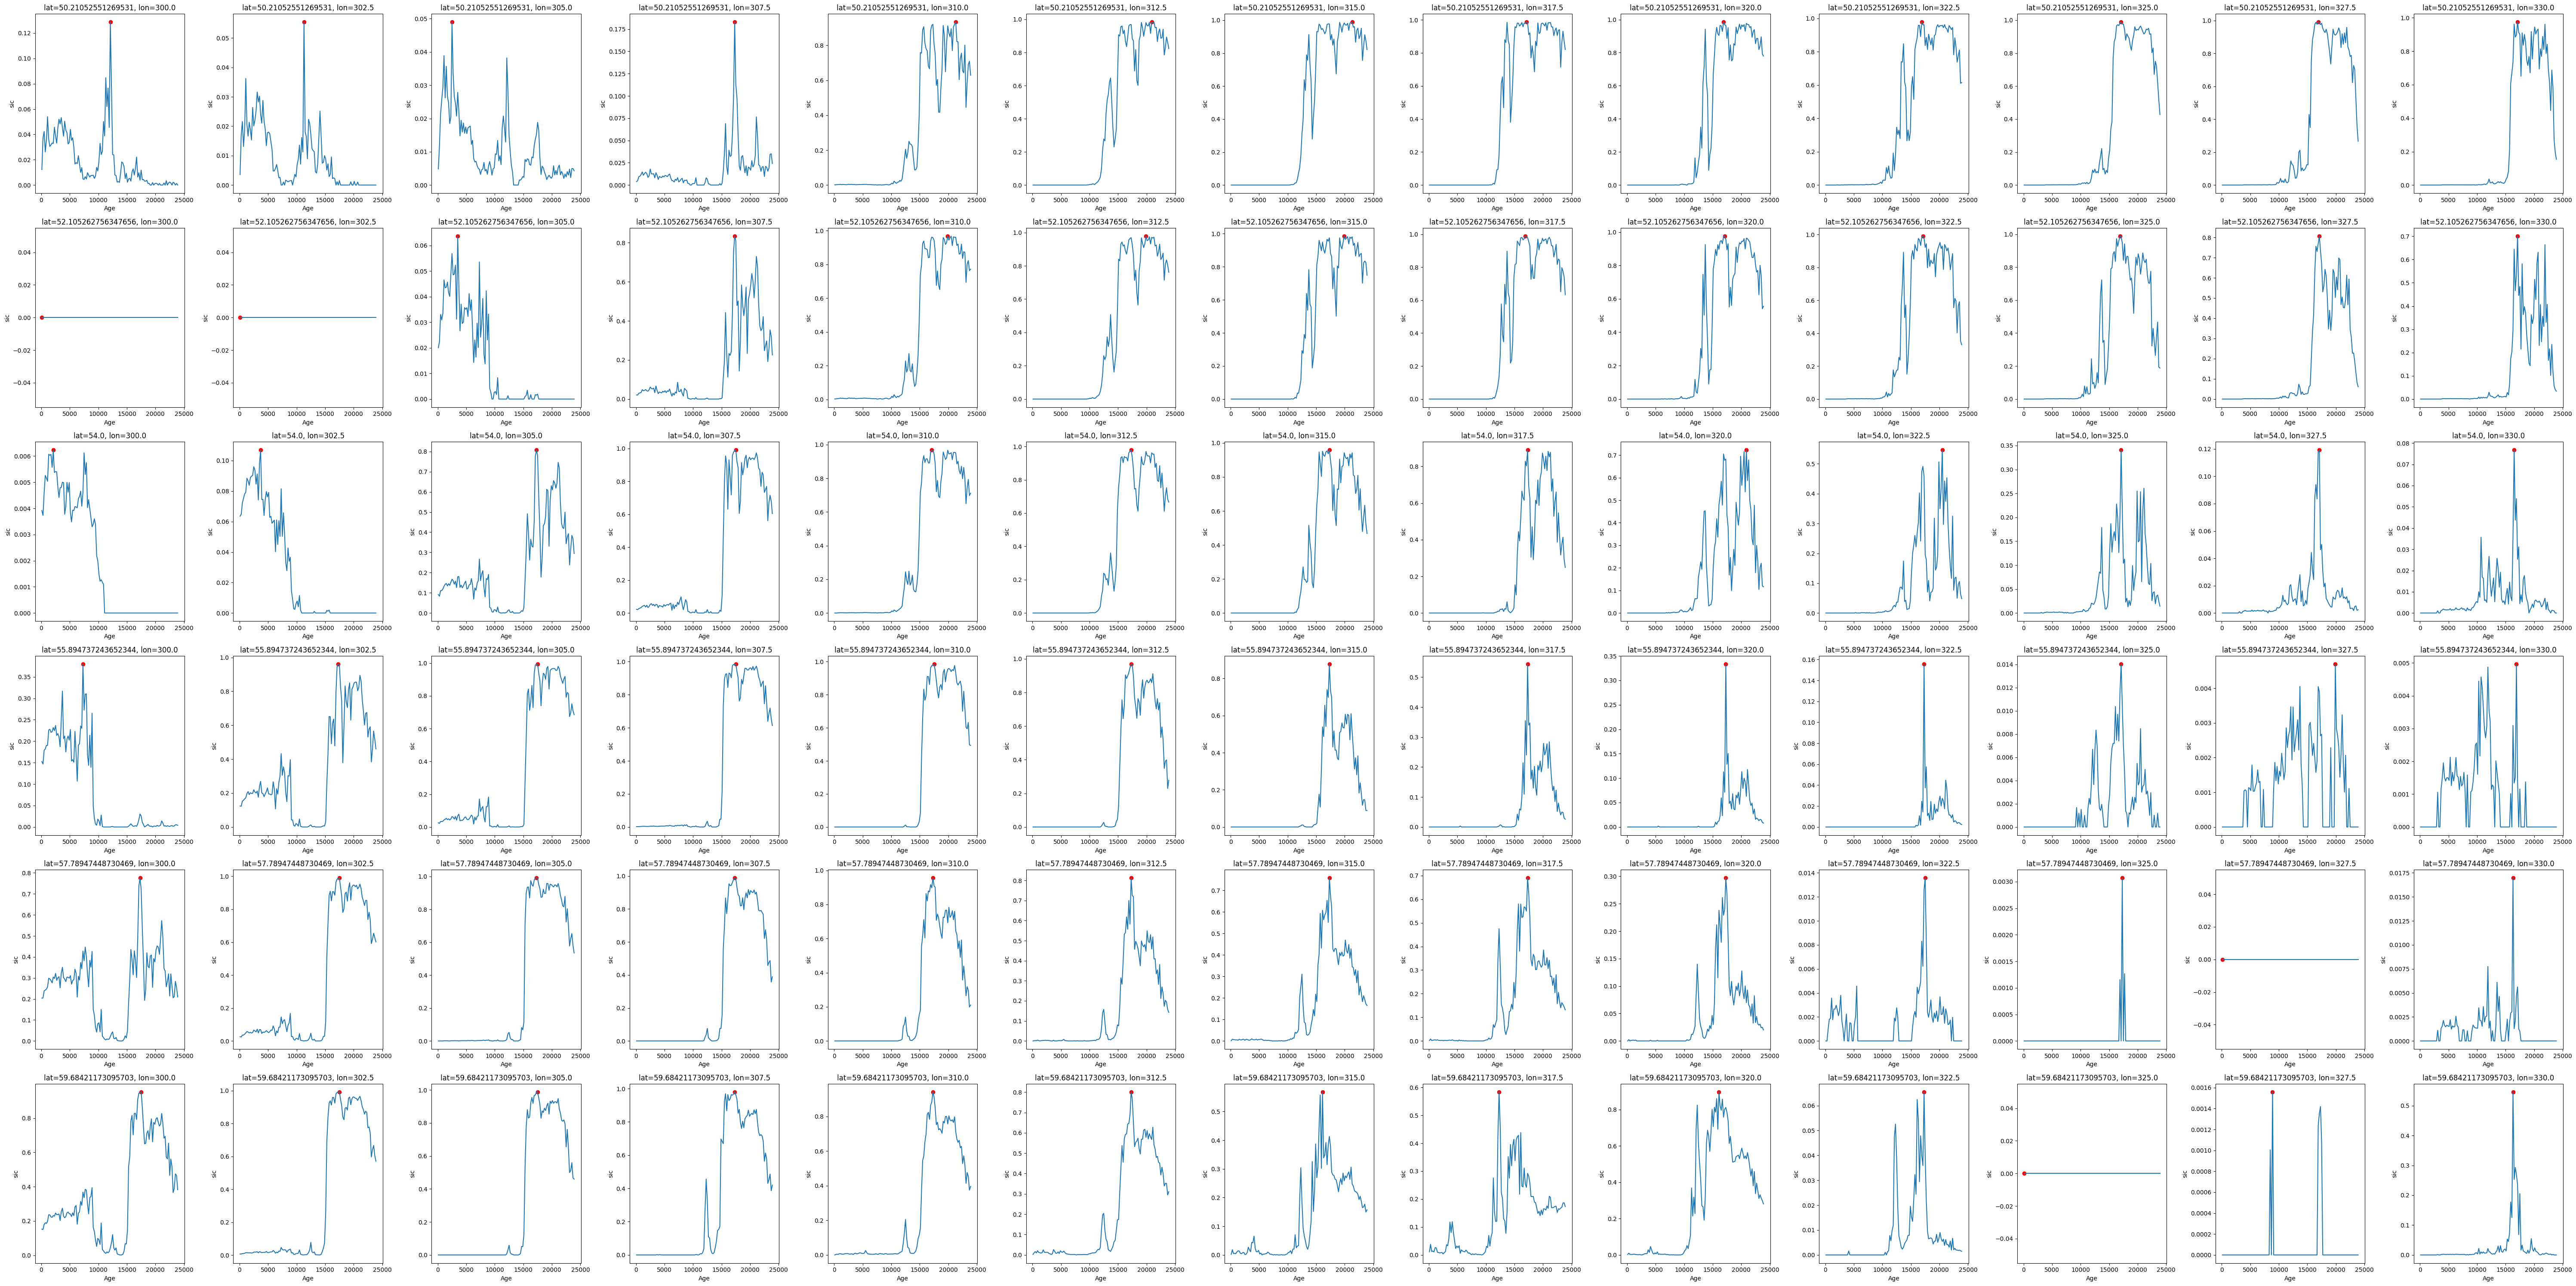

In [83]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Filter data based on longitude and latitude
ds_filtered = ds_seaice.sel(lon=slice(300, 330), lat=slice(50, 60))

# Number of longitude and latitude points
num_lons = len(ds_filtered.lon)
num_lats = len(ds_filtered.lat)

# Initialize the figure with subplots
fig, axes = plt.subplots(num_lats, num_lons, figsize=(60, 5 * num_lats))

for i, lat in enumerate(ds_filtered.lat.values):
    for j, lon in enumerate(ds_filtered.lon.values):
        ax = axes[i, j] if num_lats > 1 else axes[j]
        
        # Extract the time series data
        time_series_data = ds_filtered['sic'].isel(dims=1).sel(lat=lat, lon=lon).values
        
        # Plot the data
        ax.plot(ds_filtered.age.values, time_series_data)
        
        # Find and plot the maximum of the time series
        max_index = np.argmax(time_series_data)
        max_age = ds_filtered.age.values[max_index]
        max_value = time_series_data[max_index]
        ax.scatter(max_age, max_value, color='red')
        
        ax.set_title(f'lat={lat}, lon={lon}')
        ax.set_xlabel('Age')
        ax.set_ylabel('sic')

plt.tight_layout()
plt.show()


# Try to fit n-order polynomial on the SIC time series and find the time of sea ice retreat

# Calculate the AIC to determine the order of polynomial, not works very welll, same for the BIC

ref: https://stats.stackexchange.com/questions/442121/aic-and-its-degrees-of-freedom-for-linear-regression-models

The term `-0.5 * np.sum(residuals**2)` is a simplification of the log-likelihood for a normal distribution under certain assumptions. In general, the likelihood \( L \) for a normal distribution with a given mean \( \mu \)  and variance \( \sigma^2 \) is:

$$
L(\mu, \sigma^2) = \prod_{i=1}^{N} \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}
$$

Taking the natural logarithm \( \ln \) to both sides, we get the log-likelihood \( \ell \):

$$
\ell(\mu, \sigma^2) = -\frac{N}{2} \ln(2\pi) - \frac{N}{2} \ln(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{N} (x_i-\mu)^2
$$

In the context of fitting a model to data, \( x_i \) would be the observed data and \( \mu \) would be the fitted data (i.e., the model output). The residuals are \( r_i = x_i - \mu \), so \( \sum_{i=1}^{N} (x_i-\mu)^2 = \sum_{i=1}^{N} r_i^2 \).

If you assume that all data points have the same variance \( \sigma^2 \) and that this variance is normalized to 1, and if you're not interested in the constant terms, then you can simplify the log-likelihood to:

$$
\ell = -\frac{1}{2} \sum_{i=1}^{N} r_i^2
$$

This is a simplification often used for comparing models, and the term \( -\frac{1}{2} \sum_{i=1}^{N} r_i^2 \) serves as a proxy for the log-likelihood of the model given the data. This proxy is what is used in the code to calculate the likelihood. Note that this simplification assumes that the errors are normally distributed, which might or might not be a good assumption depending on your specific case.


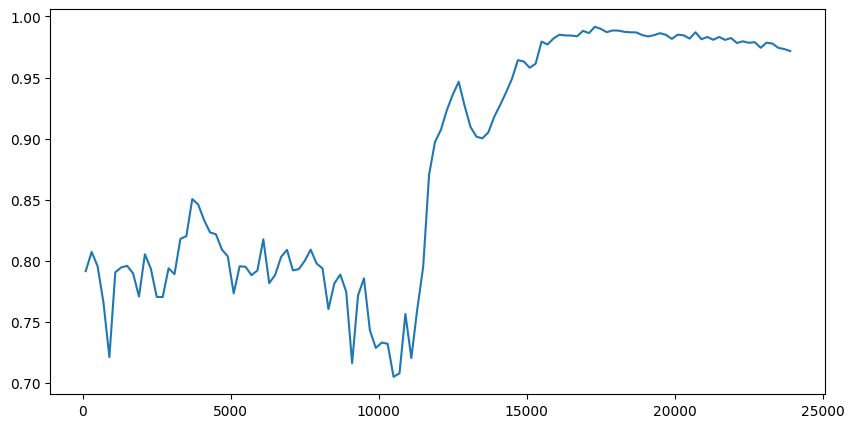

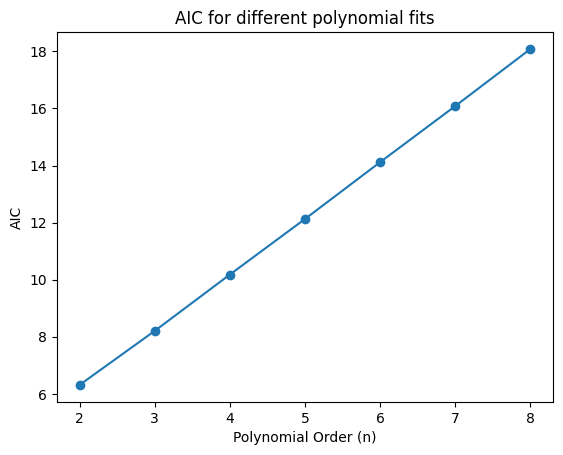

In [56]:
time_series_data = ds_seaice['sic'].isel(dims=1).isel(lat=90, lon=0).values

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(ds_seaice['age'], time_series_data)

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def polynomial(x, *coeffs):
    # Create a polynomial function with variable number of coefficients
    return sum(c * x ** i for i, c in enumerate(coeffs))

def calculate_aic(n_params, likelihood):
    # Calculate the Akaike Information Criterion
    return 2 * n_params - 2 * likelihood

aic_values = []
ns = list(range(2, 9))  # Polynomial orders from 2 to 8

for n in ns:
    # Fit polynomial of order n
    params, _ = curve_fit(polynomial, ds_seaice.age.values, time_series_data, p0=[1] * (n + 1))

    # Compute residuals and likelihood
    fitted_vals = polynomial(ds_seaice.age.values, *params)
    residuals = time_series_data - fitted_vals
    likelihood = -0.5 * np.sum(residuals**2) #

    # Calculate AIC
    aic = calculate_aic(n + 1, likelihood)
    aic_values.append(aic)

# Plot AIC values
plt.figure()
plt.plot(ns, aic_values, marker='o')
plt.title(f'AIC for different polynomial fits')
plt.xlabel('Polynomial Order (n)')
plt.ylabel('AIC')
plt.show()




# Fit the data with 8-order polynomial

ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



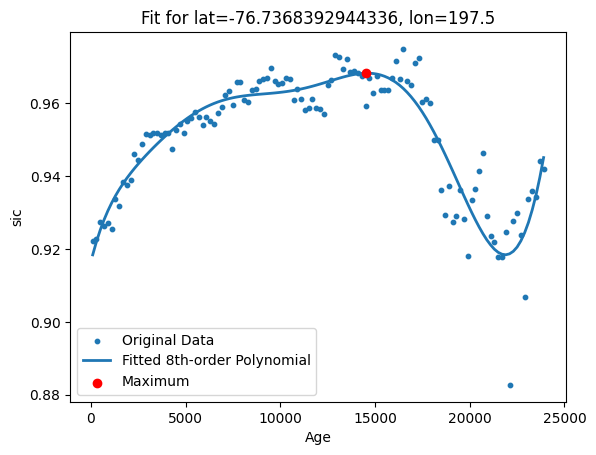

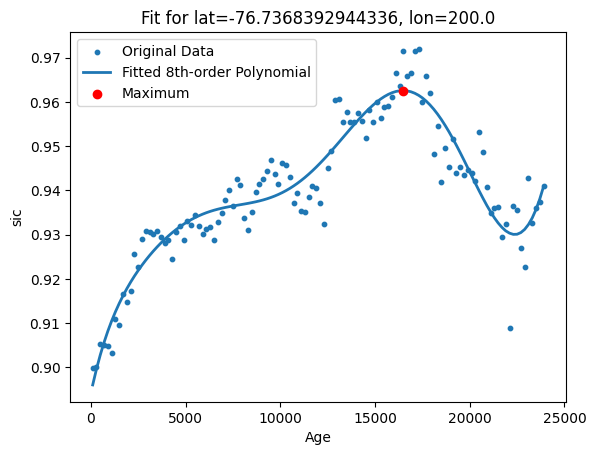

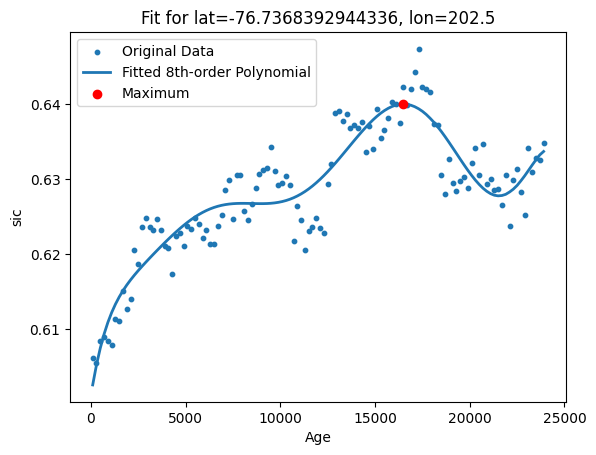

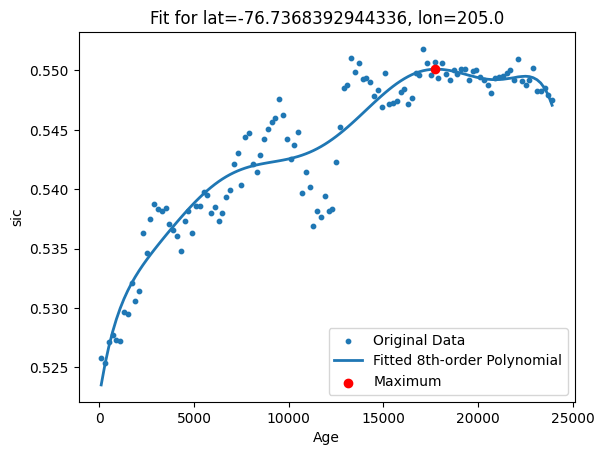

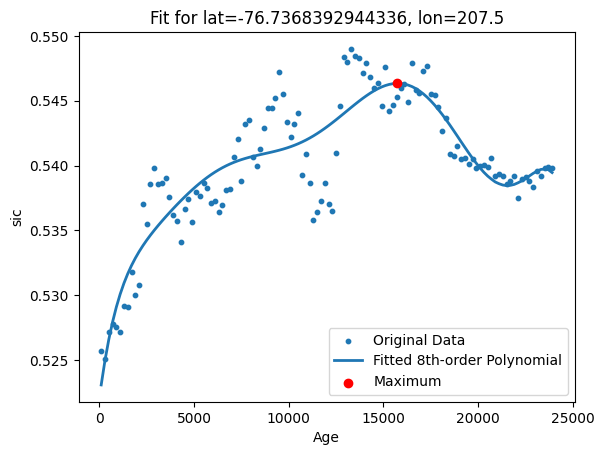

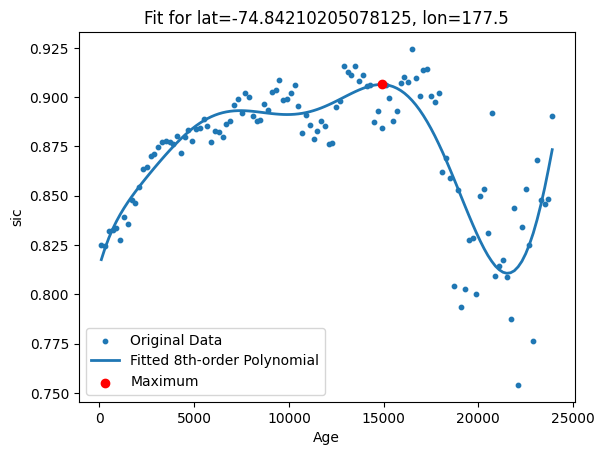

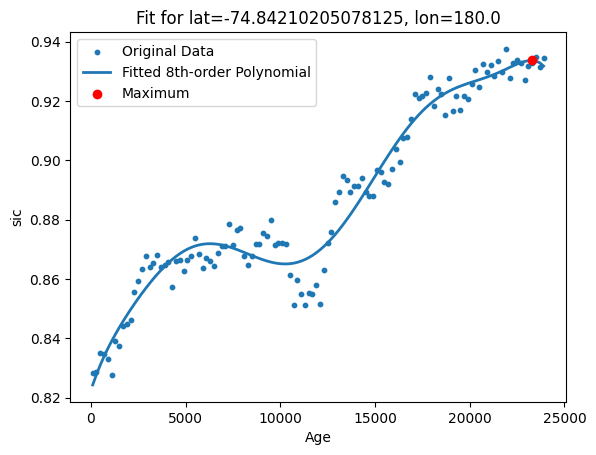

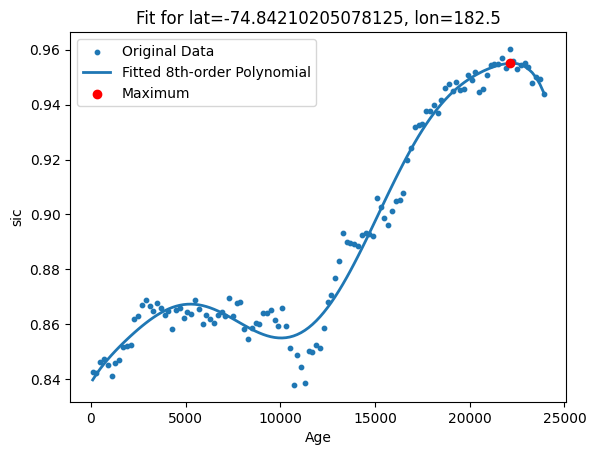

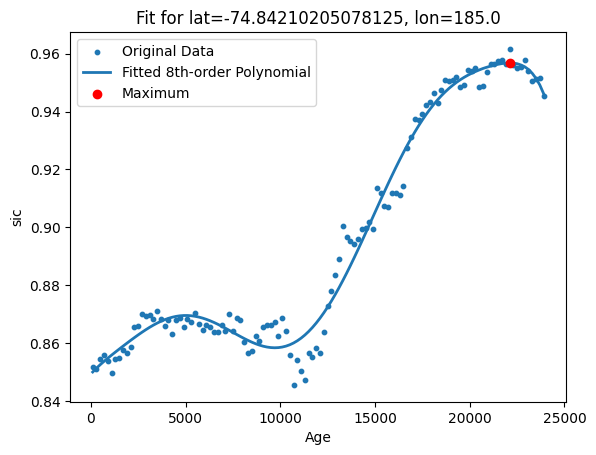

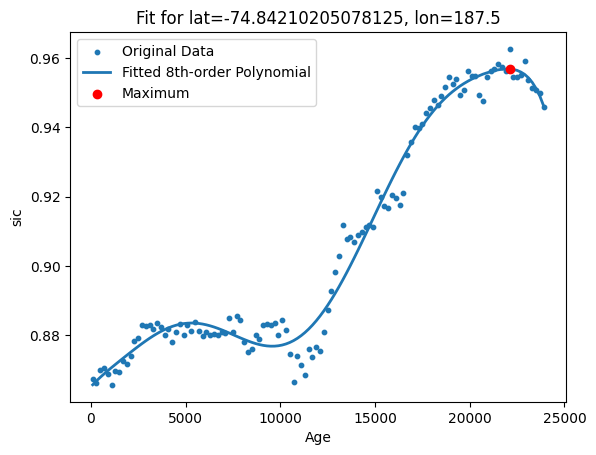

In [78]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def polynomial(x, *coeffs):
    # Create a polynomial function with variable number of coefficients
    return sum(c * x ** i for i, c in enumerate(coeffs))



# Initialize counter and 2D ndarray for storing the age at maximum
counter = 0
max_age_array = np.full((len(ds_seaice.lat.values), len(ds_seaice.lon.values)), np.nan)

# Loop through each latitude and longitude
for i, lat in enumerate(ds_seaice.lat.values):
    for j, lon in enumerate(ds_seaice.lon.values):
        
        time_series_data = ds_seaice['sic'].isel(dims=1).sel(lat=lat, lon=lon).values

        # Skip if time_series_data is all zero or with sic increasing
        if np.all(time_series_data == 0) or np.mean(time_series_data[:5]) > np.mean(time_series_data[-5:]): # skip the all zero data, and the data with SIC increasing
            continue

        # Fit a fourth-order polynomial
        n = 8
        params, _ = curve_fit(polynomial, ds_seaice.age.values, time_series_data, p0=[1] * (n + 1))

        # Generate the fitted values
        fitted_vals = polynomial(ds_seaice.age.values, *params)

        # Find and record the age where the maximum occurs
        max_idx = np.argmax(fitted_vals)
        max_age = ds_seaice.age.values[max_idx]
        max_age_array[i, j] = max_age

        # Plot the original time series and fitted polynomial for the first 10 cases
        if counter < 10:
            plt.figure()
            plt.scatter(ds_seaice.age.values, time_series_data, label='Original Data', s=10)
            plt.plot(ds_seaice.age.values, fitted_vals, label=f'Fitted {n}th-order Polynomial', linewidth=2)
            plt.scatter(max_age, fitted_vals[max_idx], c='red', zorder=5, label='Maximum')
            plt.title(f'Fit for lat={lat}, lon={lon}')
            plt.xlabel('Age')
            plt.ylabel('sic')
            plt.legend()
            plt.show()

        counter += 1




# Plot the spatial distribution of the calculated age 

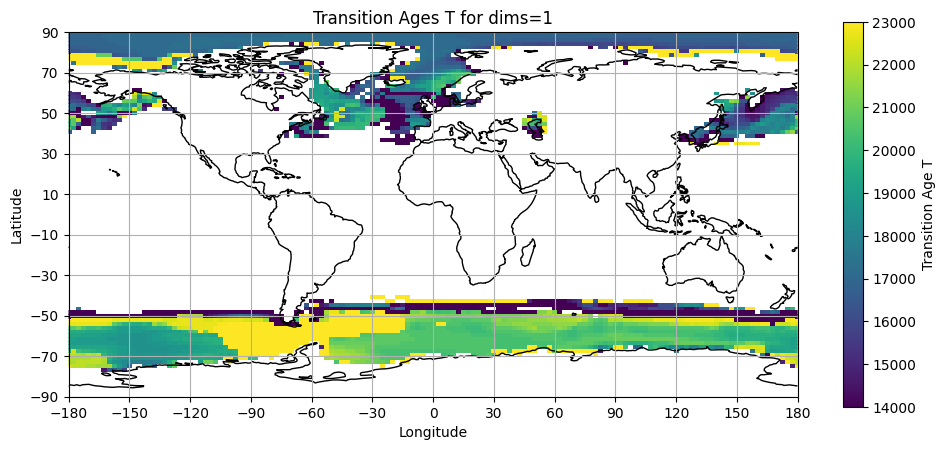

In [53]:
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Create a figure with a single subplot with map projection
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Add coastline to the subplot
ax.add_feature(cfeature.COASTLINE)

max_age_array_copy=max_age_array.copy()
# set max_age_array_copy==0 to nan
max_age_array_copy[max_age_array_copy==0]=np.nan


# Using pcolormesh for the heatmap of transition ages
c = ax.pcolormesh(ds_seaice['lon'], ds_seaice['lat'], max_age_array_copy, shading='auto', vmin=14000, vmax=23000)

# Adding colorbar and labels
plt.colorbar(c, ax=ax, shrink=0.5, label='Transition Age T')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Transition Ages T for dims=1')

# Add lat-lon grid with 10-degree steps
ax.set_xticks(np.arange(-180, 181, 30), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 91, 20), crs=ccrs.PlateCarree())
ax.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Fit the data with three stright lines and find the time for the start of sea ice retreat
ref: https://online.stat.psu.edu/stat501/lesson/8/8.8 \
https://stackoverflow.com/questions/29382903/how-to-apply-piecewise-linear-fit-in-python

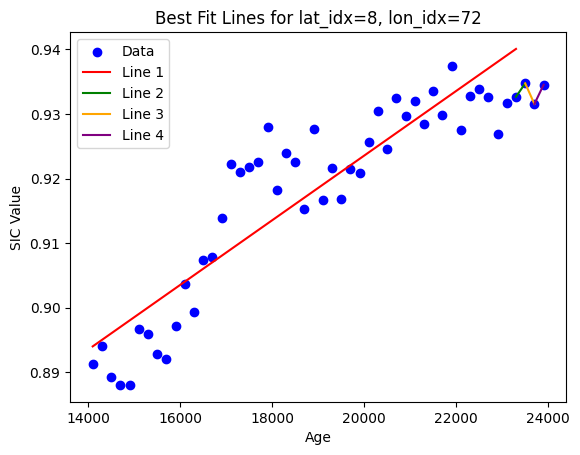

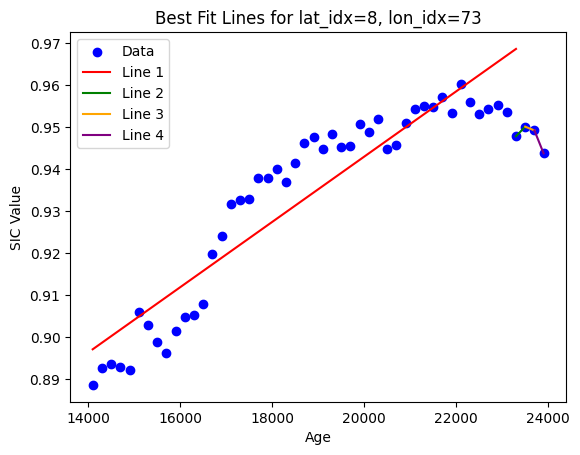

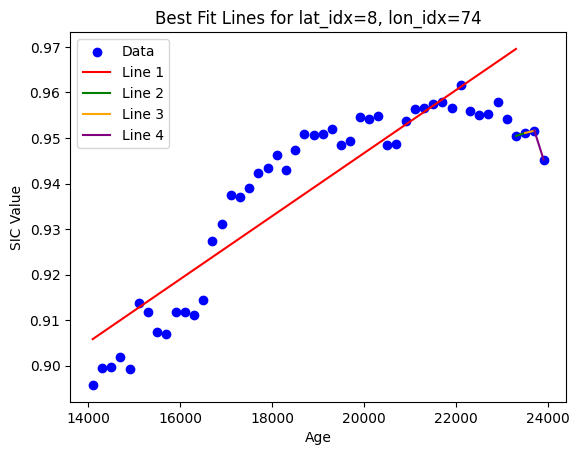

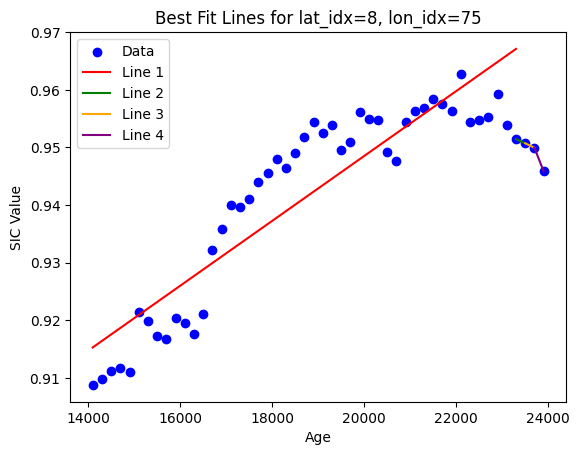

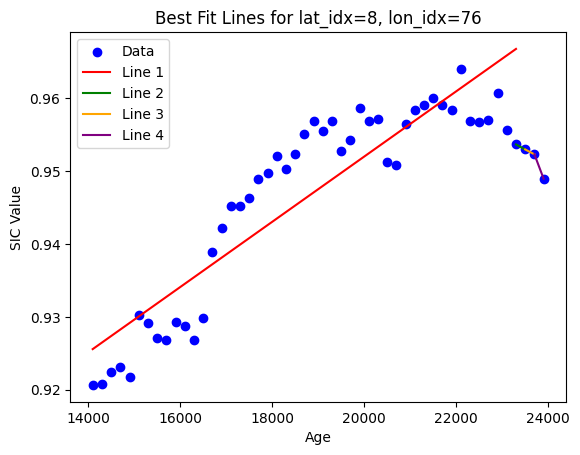

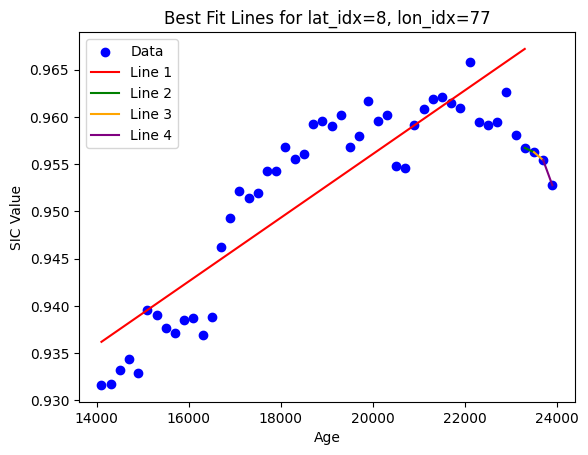

KeyboardInterrupt: 

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import xarray as xr

# Function for linear fit
def linear_fit(x, a, b):
    return a * x + b

# Initialize a 3D array to store the 'best_fit_T' values (three transition points)
T_values_array = np.zeros((len(ds_seaice['lat']), len(ds_seaice['lon']), 3))
interval_L_indx = 70
interval_R_indx = 120

cropped_age = ds_seaice['age'].values[interval_L_indx:interval_R_indx]

counter = 0

# Loop through each lat-lon grid point
for lat_idx in range(len(ds_seaice['lat'])):
    for lon_idx in range(len(ds_seaice['lon'])):
        
        # Extract the time series data for the current lat-lon point
        time_series_data = ds_seaice['sic'].isel(dims=1, lat=lat_idx, lon=lon_idx).values
        
        # Crop the age and data
        cropped_data = time_series_data[interval_L_indx:interval_R_indx]

        # Skip if time_series_data is all zero
        if np.all(cropped_data==0):
            continue

        if np.mean(cropped_data[:5])>np.mean(cropped_data[-5:]):
            continue


        # Initialize variables to store the best fit information
        best_residuals = float('inf')
        best_fit_T = [None, None, None]

        # Loop through each combination of three transition points T1, T2, T3
        for T1_idx in range(1, len(cropped_age) - 3):
            for T2_idx in range(T1_idx + 1, len(cropped_age) - 2):
                for T3_idx in range(T2_idx + 1, len(cropped_age) - 1):

                    x1, y1 = cropped_age[:T1_idx+1], cropped_data[:T1_idx+1]
                    x2, y2 = cropped_age[T1_idx:T2_idx+1], cropped_data[T1_idx:T2_idx+1]
                    x3, y3 = cropped_age[T2_idx:T3_idx+1], cropped_data[T2_idx:T3_idx+1]
                    x4, y4 = cropped_age[T3_idx:], cropped_data[T3_idx:]

                    # Fit the four lines
                    popt1, _ = curve_fit(linear_fit, x1, y1)
                    popt2, _ = curve_fit(linear_fit, x2, y2)
                    popt3, _ = curve_fit(linear_fit, x3, y3)
                    popt4, _ = curve_fit(linear_fit, x4, y4)

                    # Calculate residuals
                    residuals = np.sum((linear_fit(x1, *popt1) - y1)**2) + \
                                np.sum((linear_fit(x2, *popt2) - y2)**2) + \
                                np.sum((linear_fit(x3, *popt3) - y3)**2) + \
                                np.sum((linear_fit(x4, *popt4) - y4)**2)

                    # Update best fit if this fit is better
                    if residuals < best_residuals:
                        best_residuals = residuals
                        best_fit_T = [cropped_age[T1_idx], cropped_age[T2_idx], cropped_age[T3_idx]]

        # Store the best_fit_T in the 3D array
        T_values_array[lat_idx, lon_idx, :] = best_fit_T

        # Plot the first 10 instances for checking
        if counter < 10:
            plt.figure()
            
            # Plot the actual data
            plt.scatter(cropped_age, cropped_data, label='Data', color='blue')
            
            # Extended x-ranges for the four segments
            extended_x1 = np.linspace(min(x1), max(x1), 100)
            extended_x2 = np.linspace(min(x2), max(x2), 100)
            extended_x3 = np.linspace(min(x3), max(x3), 100)
            extended_x4 = np.linspace(min(x4), max(x4), 100)

            # Plot the four lines
            plt.plot(extended_x1, linear_fit(extended_x1, *popt1), label='Line 1', color='red')
            plt.plot(extended_x2, linear_fit(extended_x2, *popt2), label='Line 2', color='green')
            plt.plot(extended_x3, linear_fit(extended_x3, *popt3), label='Line 3', color='orange')
            plt.plot(extended_x4, linear_fit(extended_x4, *popt4), label='Line 4', color='purple')
            
            # Add legend and labels
            plt.legend()
            plt.xlabel('Age')
            plt.ylabel('SIC Value')
            plt.title(f'Best Fit Lines for lat_idx={lat_idx}, lon_idx={lon_idx}')
            plt.show()

            counter += 1


# Fit the data use two straight lines to find the time of sea ice retreat. \
# Similar to the method introduced in WAIS (2015) 



Suppose you have two lines \( y = a_1x + b_1 \) and \( y = a_2x + b_2 \). To find the point where these lines intersect, you set their \( y \)-values equal to each other and solve for \( x \).

\[ a_1x + b_1 = a_2x + b_2 \]
\[ a_1x - a_2x = b_2 - b_1 \]
\[ x = \frac{b_2 - b_1}{a_1 - a_2} \]

This is what `intersect_age = (b2 - b1) / (a1 - a2)` is doing. It's solving for \( x \) (in this context, the age) where the two fitted lines intersect.

c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


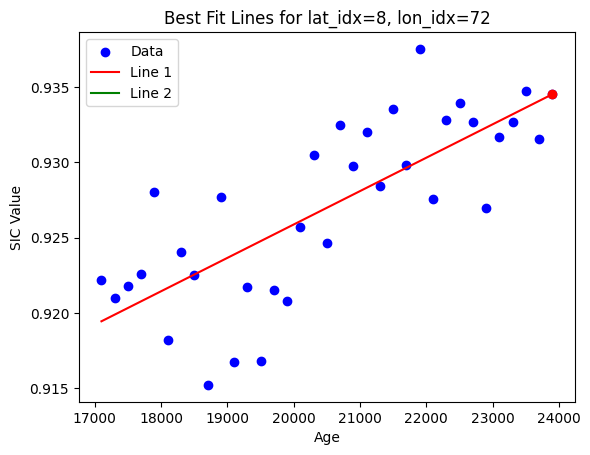

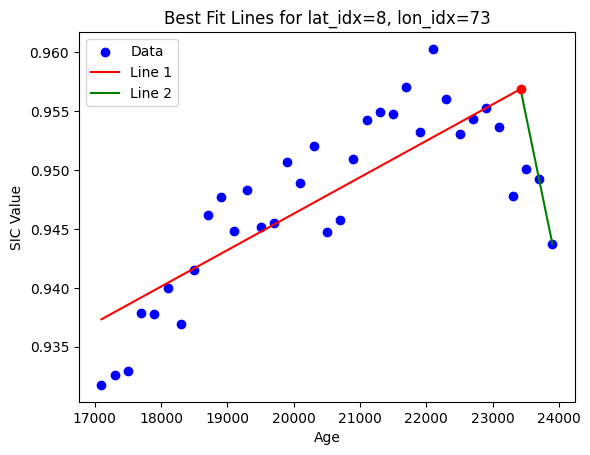

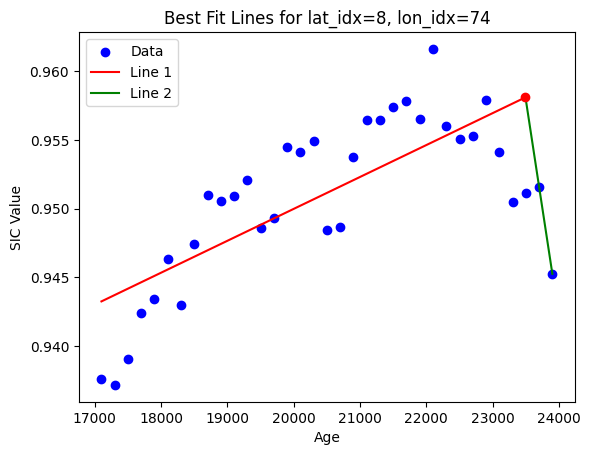

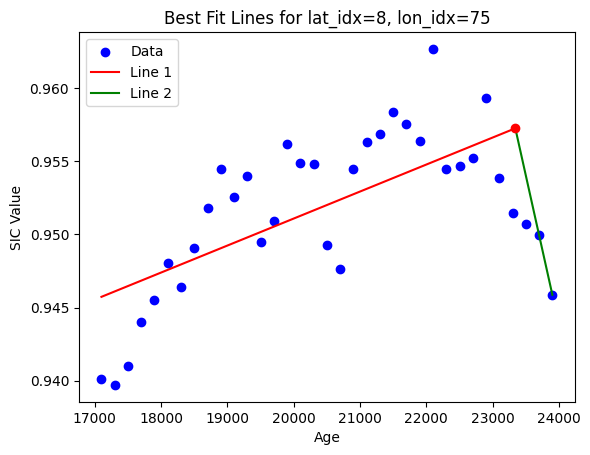

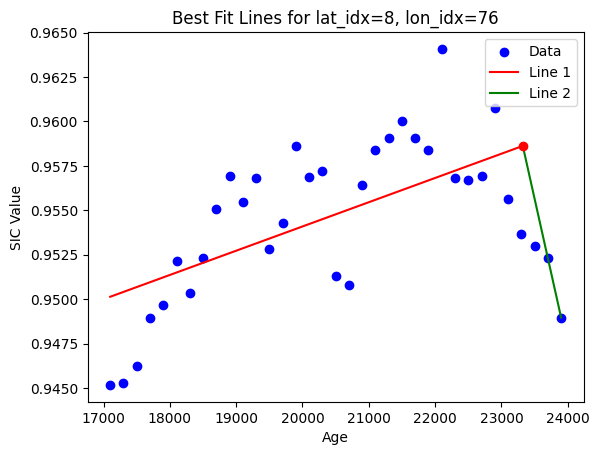

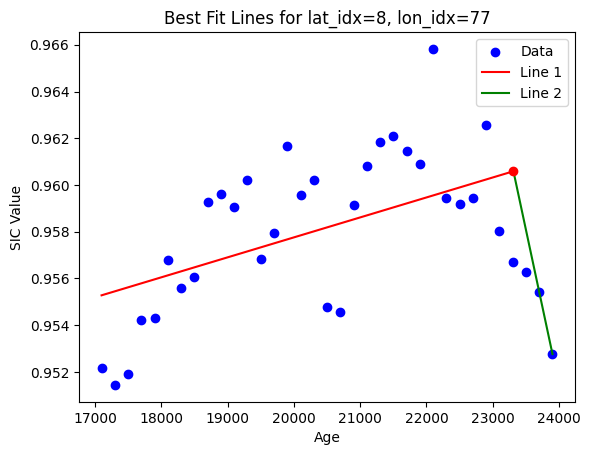

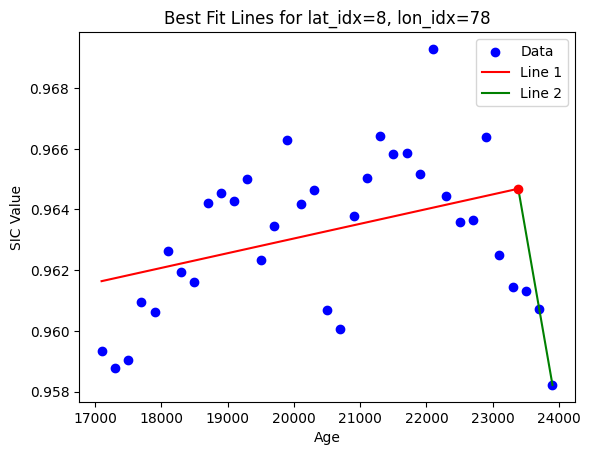

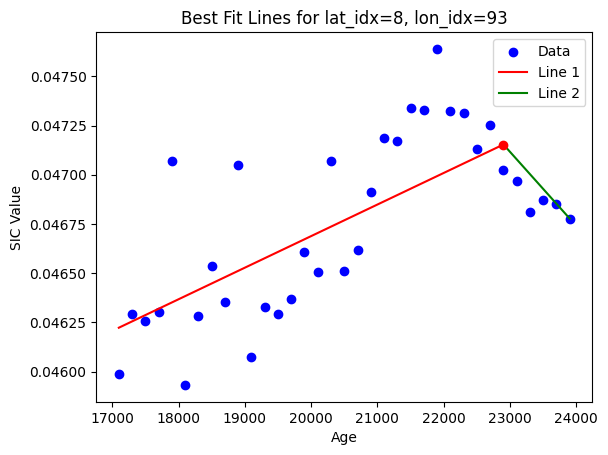

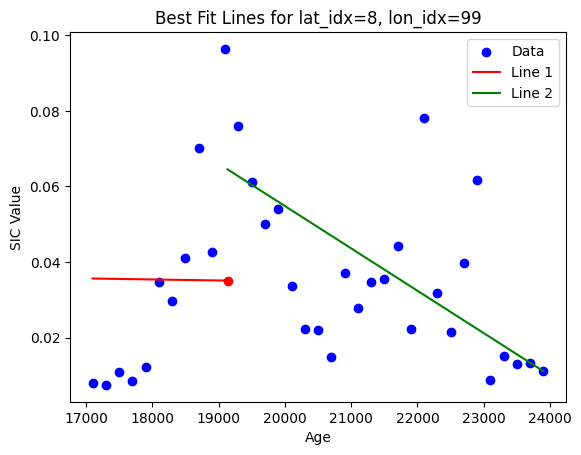

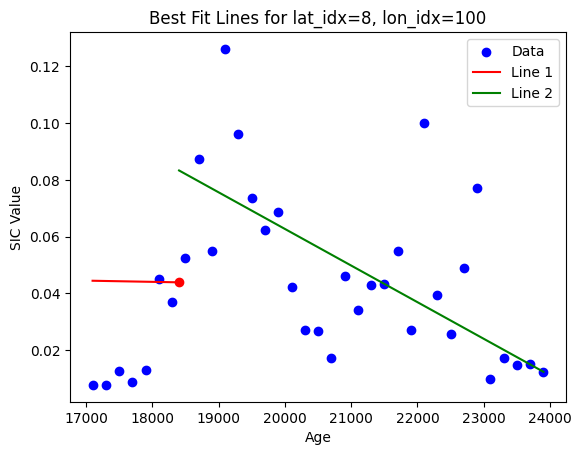

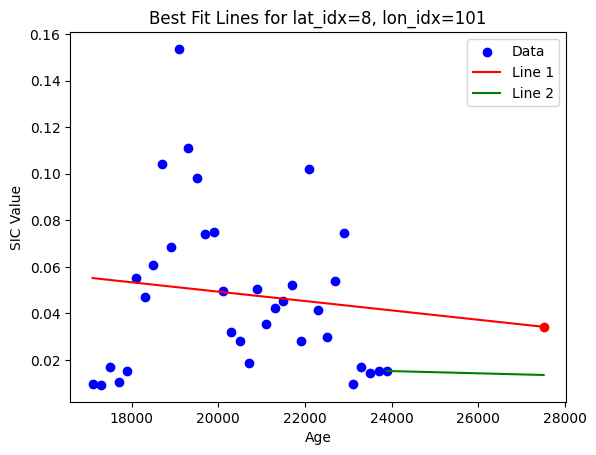

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import xarray as xr

# Function for linear fit
def linear_fit(x, a, b):
    return a * x + b

# Initialize a 2D array to store the 'best_fit_T' values
T_values_array = np.zeros((len(ds_seaice['lat']), len(ds_seaice['lon'])))
interval_L_indx=85
interval_R_indx=120

cropped_age = ds_seaice['age'].values[interval_L_indx:interval_R_indx]
transitions=cropped_age[1:-1]

counter=0
# Loop through each lat-lon grid point
for lat_idx in range(len(ds_seaice['lat'])):
    for lon_idx in range(len(ds_seaice['lon'])):
        # Extract the time series data for the current lat-lon point
        time_series_data = ds_seaice['sic'].isel(dims=1, lat=lat_idx, lon=lon_idx).values
        # skip if time_series_data is all zero
        
        # Crop the age and data 

        cropped_data = time_series_data[interval_L_indx:interval_R_indx]

        if np.all(cropped_data==0):
            continue
        else:
            # compare the mean of the first and last five data points in the cropped_data
            # if the mean of the first five data points is larger than the last five data points, skip this point
            if np.mean(cropped_data[:5])>np.mean(cropped_data[-5:]):
                continue


            # Initialize variables to store the best fit information
            best_residuals = float('inf')
            best_fit_T = None

            # Loop through each possible transition point T
            for T_idx, T in enumerate(transitions):

                # Split data at the transition point
                x1, y1 = cropped_age[:T_idx+2], cropped_data[:T_idx+2]

                x2, y2 = cropped_age[T_idx+1:], cropped_data[T_idx+1:]

                # print(T_idx, T)
                # print(len(x1), len(y1))
                # print(len(x2), len(y2))

                # Fit the two lines
                popt1, _ = curve_fit(linear_fit, x1, y1)
                popt2, _ = curve_fit(linear_fit, x2, y2)
                
                a1, b1 = popt1
                if a1<0:
                    continue
                a2, b2 = popt2
                if a2>0:
                    continue

                # Calculate residuals
                residuals = np.sum((linear_fit(x1, *popt1) - y1)**2) + np.sum((linear_fit(x2, *popt2) - y2)**2)
                
                # Update best fit if this fit is better
                if residuals < best_residuals:
                    best_residuals = residuals
                    intersect_age = (b2 - b1) / (a1 - a2)  # Age where lines intersect
                    best_fit_T = intersect_age
                    

            # Store the best_fit_T in the 2D array
            T_values_array[lat_idx, lon_idx] = best_fit_T

            if counter <= 10:
                plt.figure()
                plt.scatter(cropped_age, cropped_data, label='Data', color='blue')
                
                # Calculate intersection and extend x-range to include the intersection
                intersect_age = (b2 - b1) / (a1 - a2)
                intersect_sic = linear_fit(intersect_age, *popt1)
                extended_x1 = np.linspace(min(x1), intersect_age, 100)
                extended_x2 = np.linspace(intersect_age, max(x2), 100)
                
                plt.plot(extended_x1, linear_fit(extended_x1, *popt1), label='Line 1', color='red')
                plt.plot(extended_x2, linear_fit(extended_x2, *popt2), label='Line 2', color='green')
                
                # Mark the intersection with a red dot
                plt.scatter([intersect_age], [intersect_sic], color='red', zorder=5)
                
                plt.legend()
                plt.xlabel('Age')
                plt.ylabel('SIC Value')
                plt.title(f'Best Fit Lines for lat_idx={lat_idx}, lon_idx={lon_idx}')
                plt.show()
                
            counter += 1




In [56]:
# set the -inf in the T_values_array to 0
T_values_array[T_values_array == -np.inf] = 0
T_values_array[T_values_array >= 30000] = 0
# T_values_array=np.abs(T_values_array)

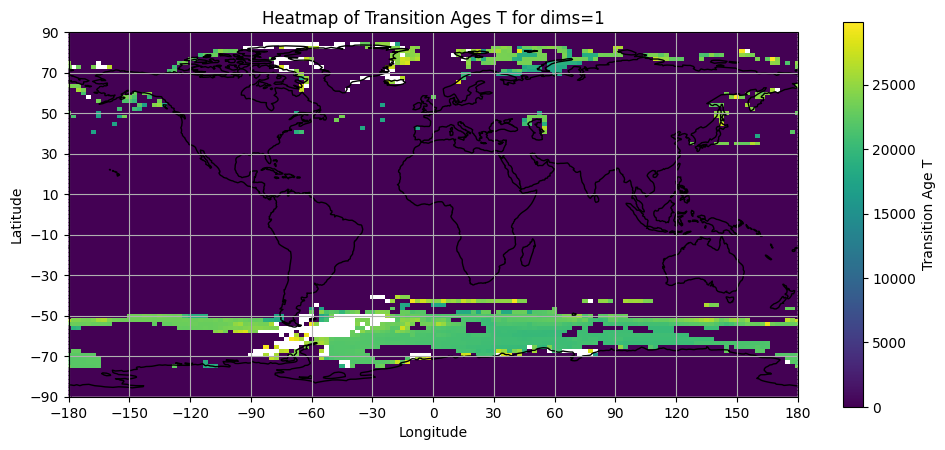

In [57]:
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Create a figure with a single subplot with map projection
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Add coastline to the subplot
ax.add_feature(cfeature.COASTLINE)

# Replace all zeros in T_values_array with nan
# T_values_array[T_values_array == 0] = np.nan

# Determine the maximum age for the colorbar limit
max_age = np.nanmax(T_values_array)  # Using nanmax to ignore NaNs

# Using pcolormesh for the heatmap of transition ages
c = ax.pcolormesh(ds_seaice['lon'], ds_seaice['lat'], T_values_array, shading='auto', vmin=0, vmax=max_age)

# Adding colorbar and labels
plt.colorbar(c, ax=ax, shrink=0.5, label='Transition Age T')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Heatmap of Transition Ages T for dims=1')

# Add lat-lon grid with 10-degree steps
ax.set_xticks(np.arange(-180, 181, 30), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 91, 20), crs=ccrs.PlateCarree())
ax.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
